<div style="text-align: center; font-family: Arial, sans-serif;">
    <h1>
        <a href="https://www.kaggle.com/datasets/mczielinski/bitcoin-historical-data" target="_blank" style="text-decoration: none; color: #2a7ae2;">
            Time Series Analysis - Bitcoin Historical Data
        </a>
    </h1>
    <h3>
        Also a TensorFlow Project from
        <a href="https://github.com/mrdbourke/tensorflow-deep-learning" target="_blank" style="text-decoration: none; color: #2a7ae2;">
            Mr. Bourke’s Deep Learning Course
        </a>
        in combination with <a href="https://www.udemy.com/course/python-for-time-series-data-analysis" target="_blank" style="text-decoration: none; color: #2a7ae2;">
            Jose Portilla’s Time Series Analysis Course
        </a>.
    </h3>
    <h4>By Mohammad Nourbakhsh Marvast</h4>
</div>

# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import tensorflow as tf
import sklearn

In [ ]:
import os
import datetime

# Loading Dataset‌

## Preparing Data For Classical Algorithms

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mczielinski/bitcoin-historical-data")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/bitcoin-historical-data


In [ ]:
! ls {path}

btcusd_1-min_data.csv


In [ ]:
df = pd.read_csv(path + "/btcusd_1-min_data.csv")

In [ ]:
df.head(10)

Timestamp  Open  High   Low  Close  Volume
0  1.325412e+09  4.58  4.58  4.58   4.58     0.0
1  1.325412e+09  4.58  4.58  4.58   4.58     0.0
2  1.325412e+09  4.58  4.58  4.58   4.58     0.0
3  1.325412e+09  4.58  4.58  4.58   4.58     0.0
4  1.325412e+09  4.58  4.58  4.58   4.58     0.0
5  1.325412e+09  4.58  4.58  4.58   4.58     0.0
6  1.325412e+09  4.58  4.58  4.58   4.58     0.0
7  1.325412e+09  4.58  4.58  4.58   4.58     0.0
8  1.325413e+09  4.58  4.58  4.58   4.58     0.0
9  1.325413e+09  4.58  4.58  4.58   4.58     0.0

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'], unit='s')
df.set_index('Timestamp', inplace=True)
df.head(10)

Open  High   Low  Close  Volume
Timestamp                                           
2012-01-01 10:01:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:02:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:03:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:04:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:05:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:06:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:07:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:08:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:09:00  4.58  4.58  4.58   4.58     0.0
2012-01-01 10:10:00  4.58  4.58  4.58   4.58     0.0

In [ ]:
df.tail(10)

Open      High       Low     Close    Volume
Timestamp                                                            
2025-08-03 00:49:00  112668.0  112720.0  112666.0  112720.0  0.787003
2025-08-03 00:50:00  112719.0  112742.0  112705.0  112738.0  0.229726
2025-08-03 00:51:00  112735.0  112808.0  112689.0  112808.0  5.537932
2025-08-03 00:52:00  112795.0  112836.0  112783.0  112836.0  1.089615
2025-08-03 00:53:00  112835.0  112863.0  112820.0  112862.0  1.356034
2025-08-03 00:54:00  112858.0  112884.0  112815.0  112884.0  1.063573
2025-08-03 00:55:00  112884.0  112930.0  112884.0  112930.0  1.742632
2025-08-03 00:56:00  112930.0  112944.0  112920.0  112920.0  0.591078
2025-08-03 00:57:00  112920.0  112922.0  112872.0  112873.0  0.652181
2025-08-03 00:58:00  112873.0  112909.0  112831.0  112909.0  0.503828

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7145018 entries, 2012-01-01 10:01:00 to 2025-08-03 00:58:00
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   Open    float64
 1   High    float64
 2   Low     float64
 3   Close   float64
 4   Volume  float64
dtypes: float64(5)
memory usage: 327.1 MB


In [ ]:
df.describe().T

count          mean           std  min        25%       50%  \
Open    7145018.0  19111.454977  26853.913187  3.8  432.00000  6885.465   
High    7145018.0  19118.638920  26861.739381  3.8  432.15000  6889.645   
Low     7145018.0  19104.056771  26845.918240  3.8  431.92000  6880.990   
Close   7145018.0  19111.456111  26853.896463  3.8  432.00000  6885.540   
Volume  7145018.0      5.217632     22.318863  0.0    0.01811     0.449   

                 75%            max  
Open    29098.000000  123110.000000  
High    29106.000000  123236.000000  
Low     29091.000000  123007.000000  
Close   29098.480000  123236.000000  
Volume      2.972201    5853.852166

In [ ]:
df_daily = df.resample('D').agg({'Open': 'first', 'High': 'max', 'Low': 'min', 'Close': 'last', 'Volume': 'sum'})
df_daily.head(10)

Open  High   Low  Close      Volume
Timestamp                                      
2012-01-01  4.58  4.84  4.58   4.84   10.000000
2012-01-02  4.84  5.00  4.84   5.00   10.100000
2012-01-03  5.00  5.32  5.00   5.29  107.085281
2012-01-04  5.29  5.57  4.93   5.57  107.233260
2012-01-05  5.57  6.46  5.57   6.42   70.328742
2012-01-06  6.42  6.90  6.40   6.40   55.855834
2012-01-07  6.40  6.80  6.00   6.80    2.795858
2012-01-08  6.80  6.90  6.80   6.90    4.000000
2012-01-09  6.90  7.00  6.36   6.48   64.869323
2012-01-10  6.48  7.10  6.23   7.10   60.691941

Text(0, 0.5, 'Price (USD)')

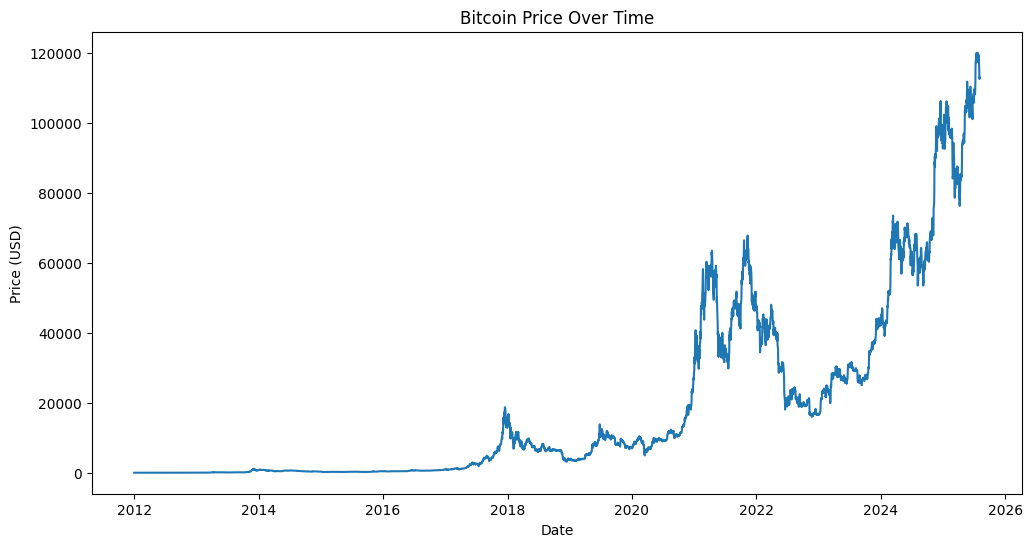

In [ ]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_daily, x='Timestamp', y='Close')
#sns.lineplot(data=df['2020-01-01': '2023-01-01'], x='Timestamp', y='Close')
plt.title('Bitcoin Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')

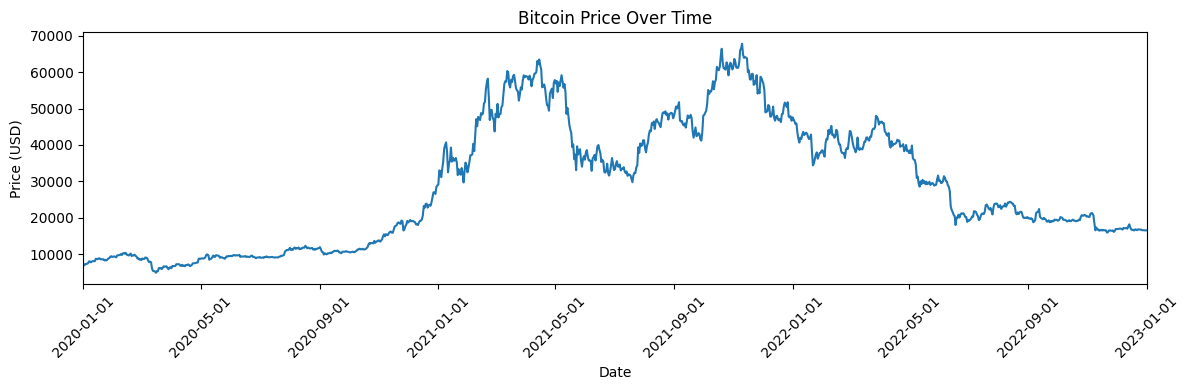

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Create figure and axes first, then use seaborn on ax
fig, ax = plt.subplots(figsize=(12, 4))

sns.lineplot(data=df_daily['2020-01-01':'2023-01-01'], x='Timestamp', y='Close', ax=ax)

# Title and labels
ax.set_title('Bitcoin Price Over Time')
ax.set_xlabel('Date')
ax.set_ylabel('Price (USD)')

# Major ticks: Year-Month-Day
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Make minor tick labels visible
ax.tick_params(axis='x', which='minor', labelbottom=True, labelsize=10)

# Rotate major labels
plt.setp(ax.get_xticklabels(), rotation=45)

ax.autoscale(enable=True, axis='x', tight=True)

plt.tight_layout()
plt.show()


## Hodrick–Prescott (HP) Filter
#### To see the trend and cyclic behaviour

In [ ]:
from statsmodels.tsa.filters.hp_filter import hpfilter

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/filters/hp_filter.py:100: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  trend = spsolve(I+lamb*K.T.dot(K), x, use_umfpack=use_umfpack)


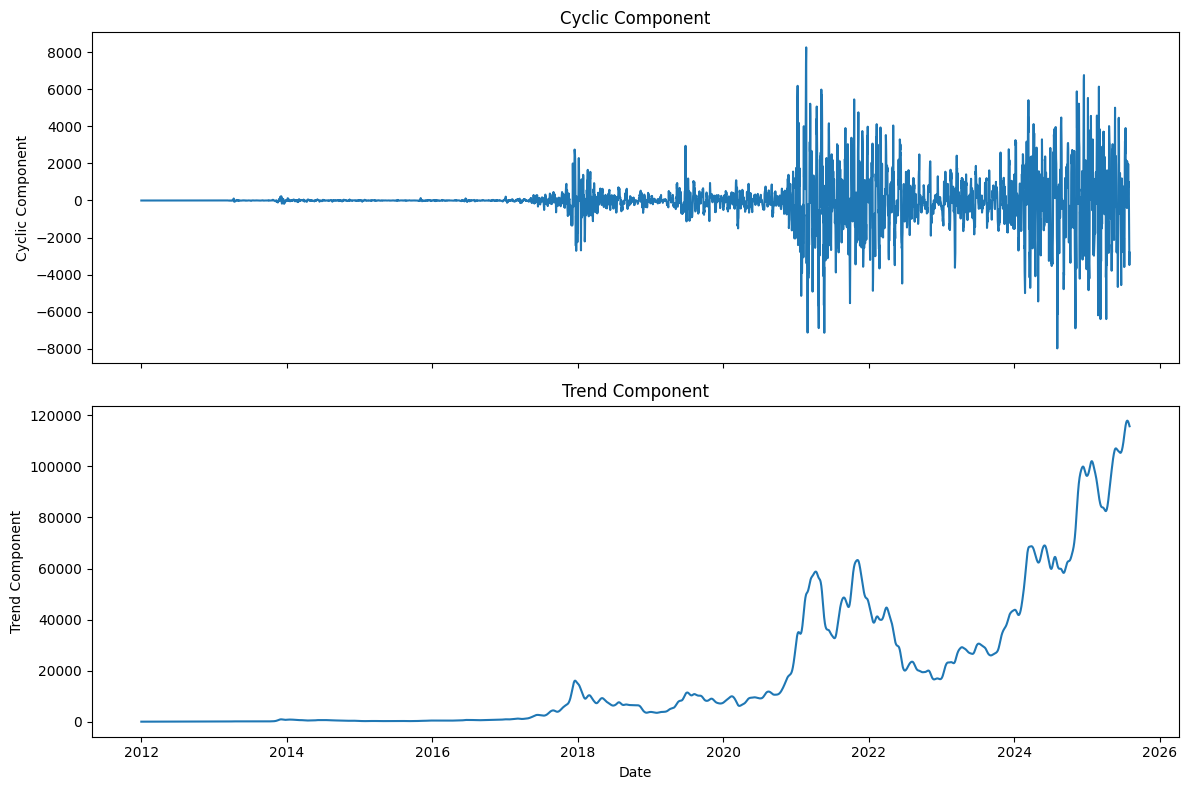

In [ ]:
close_cyclic, close_trend = hpfilter(df_daily['Close'])

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
sns.lineplot(x= close_cyclic.index, y=close_cyclic, ax=axes[0])
sns.lineplot(x= close_trend.index, y=close_trend, ax=axes[1])

axes[0].set_title('Cyclic Component')
axes[1].set_title('Trend Component')

axes[0].set_xlabel('')
axes[1].set_xlabel('Date')

axes[0].set_ylabel('Cyclic Component')
axes[1].set_ylabel('Trend Component')

plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

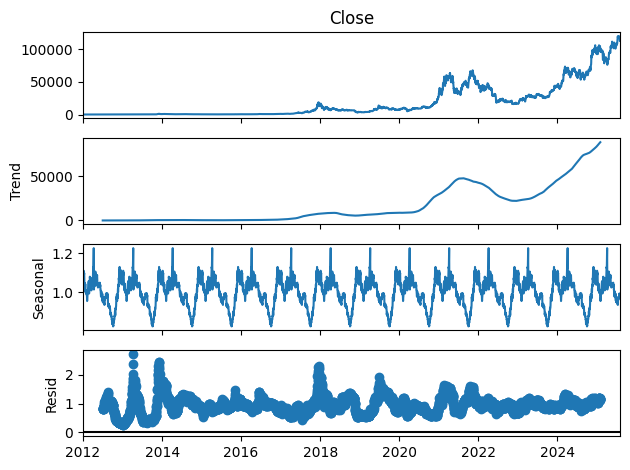

In [ ]:
decomposition = seasonal_decompose(df_daily['Close'], model='multiplicative', period=365)
decomposition.plot();

## Splitting The Data Into Training Set and Testing Set

In [ ]:
X_train = df_daily[:'2025-05-31']['Close']
X_test = df_daily['2025-06-01':]['Close']

<Axes: xlabel='Timestamp'>

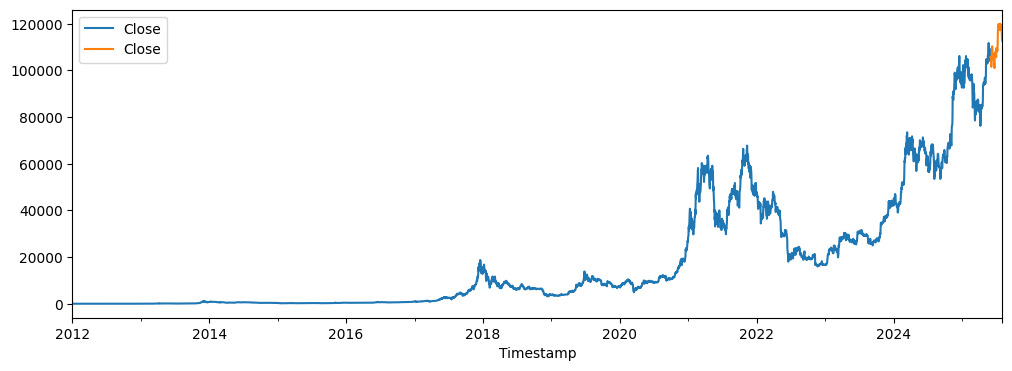

In [ ]:
plt.figure(figsize=(12, 4))
X_train.plot(legend=True)
X_test.plot(legend=True)

# Usefull Functions

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

def plot_multiple_series(
    series_dict,
    ax=None,
    shifts=None,
    title='Time Series Comparison',
    xlabel='Date',
    ylabel='Value',
    date_format='%Y-%m-%d',
    rotate_xticks=45,
    figsize=(12, 4)
):
    """
    Plot multiple time series on the same axes.

    Parameters:
        series_dict (dict): Dictionary of {label: pd.Series} to plot.
        ax (matplotlib.axes.Axes or None): Optional axis to plot on.
        shifts (dict): Optional {label: int} dict to shift each series.
        title (str): Plot title.
        xlabel (str): Label for x-axis.
        ylabel (str): Label for y-axis.
        date_format (str): Format for x-axis date labels.
        rotate_xticks (int): Degrees to rotate x-tick labels.
        figsize (tuple): Size of the plot if ax is None.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=figsize)

    if shifts is None:
        shifts = {}

    for label, series in series_dict.items():
        shift_val = shifts.get(label, 0)
        shifted_series = series.shift(shift_val) if shift_val != 0 else series
        ax.plot(shifted_series, label=label)

    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    # Format x-axis as dates
    ax.xaxis.set_major_locator(mdates.AutoDateLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter(date_format))

    ax.autoscale(enable= True, axis= 'x', tight=True)
    plt.setp(ax.get_xticklabels(), rotation=rotate_xticks)

    ax.legend()
    return ax


In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def evaluate_forecasts(actual, predicted, training_series=None, naive_strategy='last'):
    """
    Evaluate forecasting performance using standard error metrics and MASE.

    Parameters:
        actual (array-like): Ground truth values.
        predicted (array-like): Forecasted or predicted values.
        training_series (array-like, optional): Series used to compute naive MAE for MASE.
                                                If None, defaults to 'actual'.
        naive_strategy (str): Strategy for naive forecast baseline. Options:
                              - 'shift' (1-step lag: y_{t-1})
                              - 'last' (last value of training series)

    Returns:
        dict: Evaluation metrics including RMSE, MAE, R², MASE, mean/median/std.
    """
    actual = np.array(actual).flatten()
    predicted = np.array(predicted).flatten()

    # Error metrics
    rmse = round(np.sqrt(mean_squared_error(actual, predicted)), 2)
    mae = round(mean_absolute_error(actual, predicted), 2)
    r2 = round(r2_score(actual, predicted), 2)

    # Fallback for training_series
    if training_series is None:
        training_series = actual
    training_series = np.array(training_series).flatten()

    # Compute denominator for MASE
    mase = np.nan
    if naive_strategy == 'shift':
        # 1-step naive forecast: y_t ~ y_{t-1}
        if len(training_series) < 2:
            mase = np.nan
        else:
            naive_errors = np.abs(training_series[1:] - training_series[:-1])
            denom = np.mean(naive_errors)
            mase = round(mae / denom, 2) if denom != 0 else np.nan

    elif naive_strategy == 'last':
        # Constant forecast using last value from training
        last_val = training_series[-1]
        naive_forecast = np.full_like(actual, fill_value=last_val)
        denom = mean_absolute_error(actual, naive_forecast)
        mase = round(mae / denom, 2) if denom != 0 else np.nan

    # Descriptive stats
    mean_test = round(np.mean(actual), 2)
    mean_pred = round(np.mean(predicted), 2)
    median_test = round(np.median(actual), 2)
    median_pred = round(np.median(predicted), 2)
    std_test = round(np.std(actual), 2)
    std_pred = round(np.std(predicted), 2)

    return {
        'rmse': float(rmse),
        'mae': float(mae),
        'r2': float(r2),
        'mase': float(mase),
        'mean_test': float(mean_test),
        'mean_pred': float(mean_pred),
        'median_test': float(median_test),
        'median_pred': float(median_pred),
        'std_test': float(std_test),
        'std_pred': float(std_pred)
    }


In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

def tf_evaluate_forecasts(actual, predicted, training_series=None, naive_strategy='last'):
    """
    Evaluate forecasting performance using TensorFlow ops.

    Parameters:
        actual (array-like or Tensor): Ground truth values.
        predicted (array-like or Tensor): Forecasted or predicted values.
        training_series (array-like or Tensor, optional): Training data used for MASE calculation.
        naive_strategy (str): Strategy for naive baseline for MASE.
                              'shift' (1-step-ahead) or 'last' (last value forecasting).

    Returns:
        dict: A dictionary containing:
            - rmse: Root Mean Squared Error
            - mae: Mean Absolute Error
            - r2: R² (coefficient of determination)
            - mase: Mean Absolute Scaled Error (if training_series is provided)
            - mean_test / mean_pred: Means
            - median_test / median_pred: Medians
            - std_test / std_pred: Standard deviations
    """

    actual = tf.convert_to_tensor(actual, dtype=tf.float32)
    predicted = tf.convert_to_tensor(predicted, dtype=tf.float32)

    # Basic metrics
    mae = K.mean(K.abs(actual - predicted)).numpy()
    mse = K.mean(K.square(actual - predicted)).numpy()
    rmse = tf.sqrt(mse).numpy()

    # R² Score
    ss_res = K.sum(K.square(actual - predicted))
    ss_tot = K.sum(K.square(actual - K.mean(actual)))
    r2 = 1 - (ss_res / ss_tot)
    r2 = r2.numpy()

    # Descriptive stats
    mean_test = K.mean(actual).numpy()
    mean_pred = K.mean(predicted).numpy()
    median_test = tf.experimental.numpy.median(actual).numpy()
    median_pred = tf.experimental.numpy.median(predicted).numpy()
    std_test = K.std(actual).numpy()
    std_pred = K.std(predicted).numpy()

    result = {
        'rmse': round(float(rmse), 2),
        'mae': round(float(mae), 2),
        'r2': round(float(r2), 2),
        'mase': None,
        'mean_test': round(float(mean_test), 2),
        'mean_pred': round(float(mean_pred), 2),
        'median_test': round(float(median_test), 2),
        'median_pred': round(float(median_pred), 2),
        'std_test': round(float(std_test), 2),
        'std_pred': round(float(std_pred), 2)
    }

    # MASE
    if training_series is not None:
        training_series = tf.convert_to_tensor(training_series, dtype=tf.float32)

        if naive_strategy == 'shift':
            naive_forecast = training_series[1:]
            naive_actual = training_series[:-1]
        elif naive_strategy == 'last':
            last_value = training_series[-1]
            naive_forecast = tf.repeat(last_value, tf.shape(actual)[0])
            naive_actual = actual  # same shape
        else:
            raise ValueError("naive_strategy must be 'shift' or 'last'")

        # MAE of naive model
        naive_mae = K.mean(K.abs(naive_forecast - naive_actual)).numpy()

        if naive_mae == 0:
            mase = float('inf')
        else:
            mase = mae / naive_mae

        result['mase'] = round(float(mase), 2)

    return result


### 📊 Forecast Evaluation Guide

The `evaluate_forecasts` function computes key performance metrics and summary statistics  
to assess how well your forecasted values match the actual observations.

---

#### 🔹 Metrics Returned:

- **`rmse`** (Root Mean Squared Error):  
  Measures the square root of the average squared difference between actual and predicted values.  
  Sensitive to large errors. Lower is better.

- **`mae`** (Mean Absolute Error):  
  Average of the absolute differences between actual and predicted values.  
  Easier to interpret than RMSE. Lower is better.

- **`r2`** (R-squared / Coefficient of Determination):  
  Measures how well the predictions explain the variation in the actual data.  
  - Ranges from $-∞$ to $1$  
  - **1.0** = perfect fit  
  - **0.0** = model predicts the mean  
  - **< 0.0** = worse predicting the mean

- **`mase`** (Mean Absolute Scaled Error):  
  Scale-independent error metric. Compares your model's MAE to a naive baseline:  
  $$
  \text{MASE} = \frac{\text{MAE of your model}}{\text{MAE of naive forecast}}
  $$
  - **MASE = 1** → model is as good as naive  
  - **MASE < 1** → model is better than naive  
  - **MASE > 1** → model is worse than naive

---

#### 🔹 Summary Statistics:

- **`mean_test` / `mean_pred`**:  
  Mean of the actual and predicted values. Helps compare overall bias in forecasting.

- **`median_test` / `median_pred`**:  
  Median of actual and predicted values. Useful for checking skewness or outliers.

- **`std_test` / `std_pred`**:  
  Standard deviation of actual and predicted values.  
  Indicates how well the forecast captures variability.

---

### ✅ How to Use:
Call the function after making predictions:

```python
evaluate_forecasts(actual=y_test, predicted=y_pred, training_series=y_train, naive_strategy='shift')

# Model 0: Naive Forecast - Baseline Model

### 📘 Naive Forecast Explanation

The **naive forecast** is the simplest method for time series forecasting.

---

#### 🔹 Definition:
For a time series $ y_1, y_2, \dots, y_t $,  
the forecast for the next time step $ t+1 $ is:

$$
\hat{y}_{t+1} = y_t
$$

---

#### 🔹 Multi-step Forecast:
For $ h $ steps ahead:

$$
\hat{y}_{t+h} = y_t \quad \text{for all } h
$$

---

#### 🔹 Seasonal Naive Forecast:
If the series has seasonality of period $ s $ (e.g., 12 for monthly data):


$$ \hat{y}_{t+h} = y_{t+h-s} $$


---

#### 🔹 Why Use It?
- Very simple and fast.
- Acts as a **baseline model**.
- Surprisingly hard to beat for noisy or stationary data.

---

#### 🔹 Limitations:
- Ignores trend, seasonality, or any complex structure.
- Not suitable for dynamic or nonlinear systems.

---

**Example**:  
If the last observed value is 100:  
- Forecast for next time: **100**  
- Forecast for next 5 steps: **[100, 100, 100, 100, 100]**

## Building Up The Model

<Axes: title={'center': 'Naive Forecast'}, xlabel='Date', ylabel='Value'>

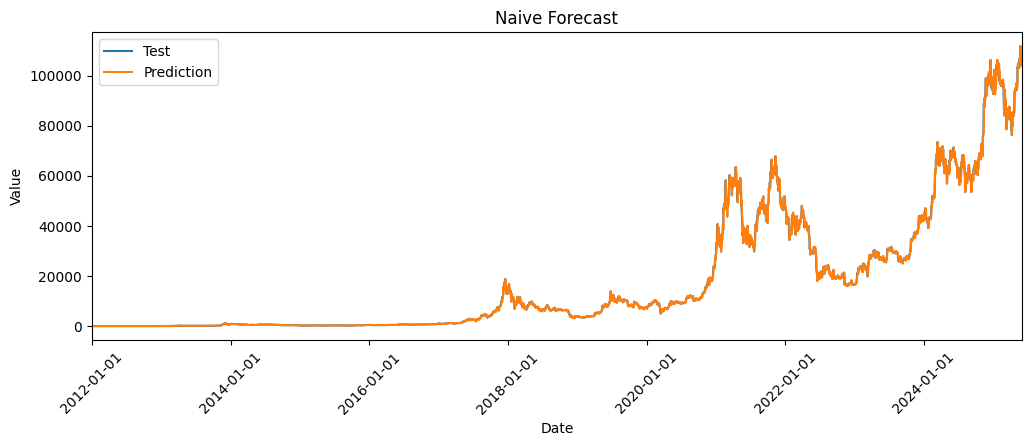

In [ ]:
model0_fittedvalues = X_train.shift(1)
plot_multiple_series(
    series_dict={
        'Test': X_train,
        'Prediction': model0_fittedvalues
    },
    title='Naive Forecast'
)

## Model Prediction

<Axes: title={'center': 'Naive Forecast'}, xlabel='Date', ylabel='Value'>

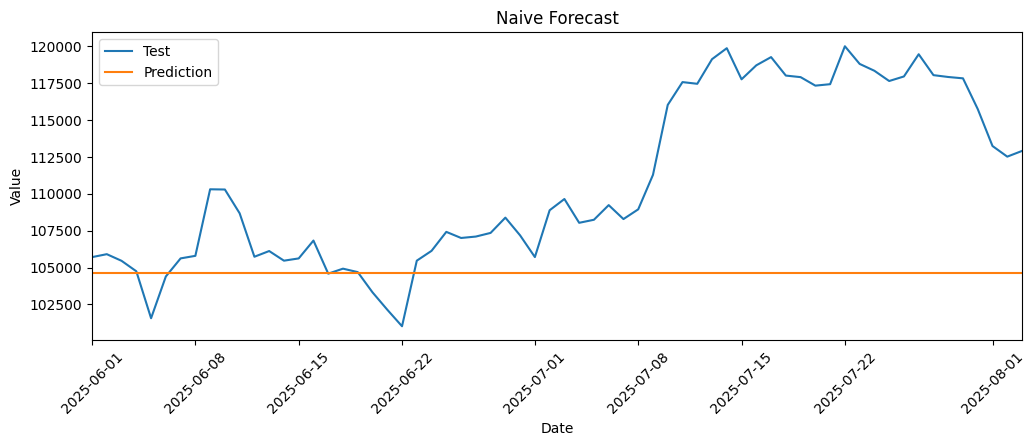

In [ ]:
model0_pred = pd.DataFrame(X_train.iloc[-1] * np.ones(len(X_test)), index= X_test.index, columns= ['Prediction'])
plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model0_pred
    },
    title='Naive Forecast'
)

## Model Evaluation

In [ ]:
model0_eval = evaluate_forecasts(X_test, model0_pred, training_series= X_train)
model0_eval

{'rmse': 8438.22,
 'mae': 6478.42,
 'r2': -1.12,
 'mase': 1.0,
 'mean_test': 110784.73,
 'mean_pred': 104646.0,
 'median_test': 108781.5,
 'median_pred': 104646.0,
 'std_test': 5789.6,
 'std_pred': 0.0}

# Model 1: Simple Exponential Smoothing

### 📘 Simple Exponential Smoothing (SES)

The **Simple Exponential Smoothing (SES)** model is a basic time series forecasting method, suitable for data with **no clear trend or seasonality**.

In our case, SES is **not ideal**, but let's train it anyway to understand how it works.

---

#### 🔹 How It Works:
SES forecasts future values using a **weighted average** of past observations, where **more recent values have more weight**.

It computes the smoothed value $S_t$ at time $t$ as:

$$
S_t = \alpha y_t + (1 - \alpha) S_{t-1}
$$

Where:
- $y_t$ is the actual observed value at time $t$
- $S_t$ is the smoothed value (forecast) at time $t$
- $\alpha \in (0, 1)$ is the **smoothing factor**

---

#### 🔹 Forecast Formula:
Once trained, the forecast for all future time points is constant and equal to the last smoothed value:

$$
\hat{y}_{t+1} = \hat{y}_{t+2} = \dots = S_t
$$

---

#### 🔹 Features:
- Emphasizes recent observations
- Ignores trend and seasonality
- Good for stationary data (with no upward/downward movement)

---

#### 🔹 Limitations:
- Not suitable for data with trend or seasonality
- Only produces **flat forecasts** beyond the last observation

## Building Up The Model

In [ ]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [ ]:
span = 30
alpha = 2 / (span + 1)

model1 = SimpleExpSmoothing(X_train)
model1_fit = model1.fit(smoothing_level= alpha, optimized=False)

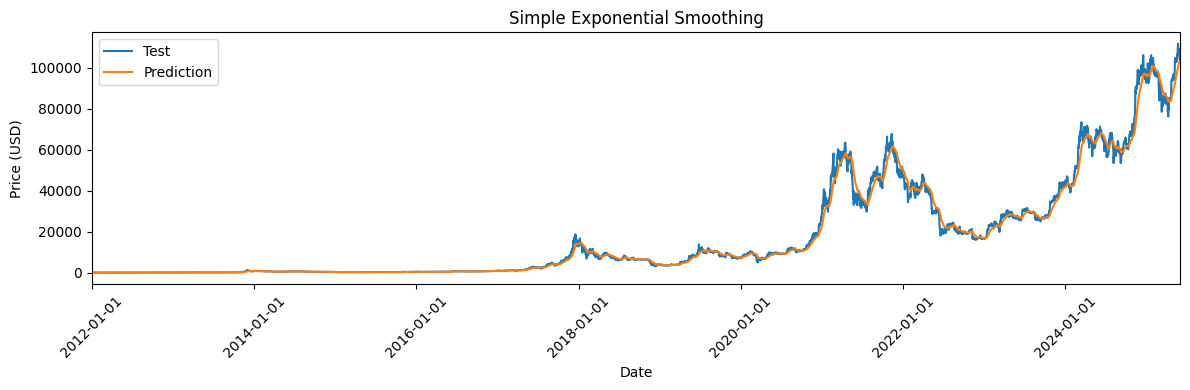

In [ ]:
fig, ax = plt.subplots(figsize=(12, 4))
plot_multiple_series(
    series_dict={
        'Test': X_train,
        'Prediction': model1_fit.fittedvalues
    },
    ax= ax,
    shifts={
        'Prediction': -1
    },
    title='Simple Exponential Smoothing',
    ylabel='Price (USD)',
    xlabel='Date',
    date_format='%Y-%m-%d',
    rotate_xticks=45,
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()


## Model Prediction

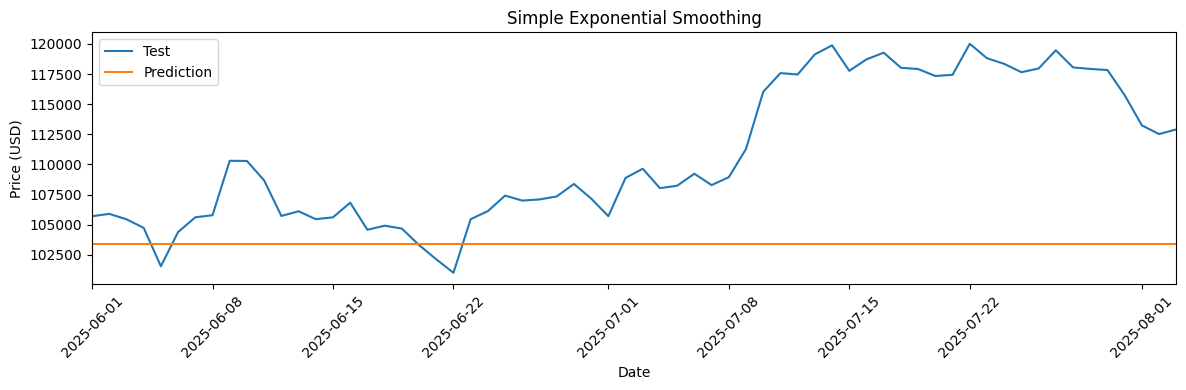

In [ ]:
model1_pred = model1_fit.forecast(len(X_test)) # Should give us a const value! That's how it works... It should be implemented on data with no seasonality or trends.

fig, ax = plt.subplots(figsize=(12, 4))
plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model1_pred
    },
    ax= ax,
    shifts={},
    title='Simple Exponential Smoothing',
    ylabel='Price (USD)',
    xlabel='Date',
    date_format='%Y-%m-%d',
    rotate_xticks=45,
    figsize=(12, 4)
)
plt.tight_layout()
plt.show()

## Model Evaluation

In [ ]:
model1_eval= evaluate_forecasts(X_test, model1_pred, training_series= X_train)
model1_eval

{'rmse': 9388.23,
 'mae': 7563.87,
 'r2': -1.63,
 'mase': 1.17,
 'mean_test': 110784.73,
 'mean_pred': 103394.24,
 'median_test': 108781.5,
 'median_pred': 103394.24,
 'std_test': 5789.6,
 'std_pred': 0.0}

#### As it is showing by R2 Score (r2 = -1.08) our model is worse than just predicting the test data mean! it's because our data has trends and the simple exponential model is not applicable for it.

# Model 2: Double Exponential Smoothing

### 📘 Double Exponential Smoothing (Holt’s Linear Trend Method)

**Double Exponential Smoothing**, also known as **Holt’s Linear Trend method**, is used to forecast time series data that exhibits a **trend**, but **no seasonality**.

---

#### 🔹 When to Use:
As we saw in the HP-filter analysis, the **trend component** is strong in our data.  
Therefore, this model is a better fit than simple exponential smoothing.

---

#### 🔹 How It Works:
This method maintains two equations:
- **Level (smoothed value)**: $l_t$
- **Trend**: $b_t$

The update formulas are:

$$
l_t = \alpha y_t + (1 - \alpha)(l_{t-1} + b_{t-1})
$$

$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta) b_{t-1}
$$

Where:
- $y_t$ is the observed value at time $t$
- $l_t$ is the estimated level at time $t$
- $b_t$ is the estimated trend
- $\alpha, \beta \in (0, 1)$ are smoothing parameters

---

#### 🔹 Forecast Formula:
The forecast $h$ steps ahead is:

$$
\hat{y}_{t+h} = l_t + h \cdot b_t
$$

---

#### 🔹 Features:
- Captures linear trend
- Adapts to changes in the trend over time
- More flexible than SES for trending data

---

#### 🔹 Limitations:
- Does not model seasonality
- Assumes trend continues linearly into the future

## Building Up The Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model2 = ExponentialSmoothing(X_train/ 10000, trend= 'mul')
model2_fit = model2.fit(optimized=True)


<Axes: title={'center': 'Double Exponential Smooting'}, xlabel='Date', ylabel='Value'>

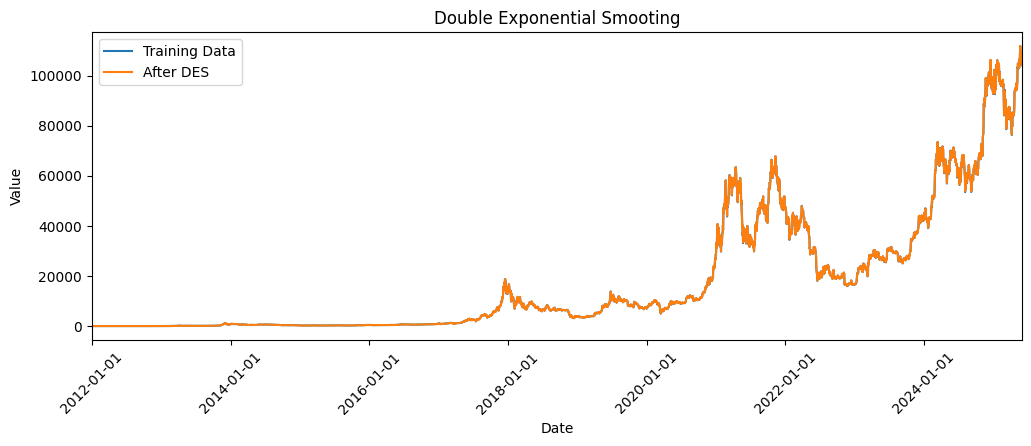

In [ ]:
plot_multiple_series(
    series_dict={
        'Training Data': X_train,
        'After DES': model2_fit.fittedvalues * 10000
    },
    shifts={
        'After DES': -1
    },
    title= 'Double Exponential Smooting'
)

## Model Prediction

<Axes: title={'center': 'Double Exponential Smooting'}, xlabel='Date', ylabel='Value'>

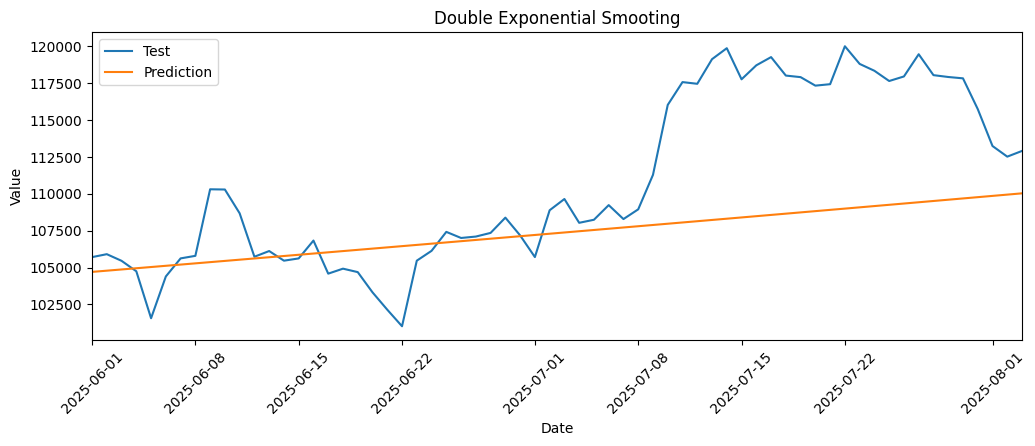

In [ ]:
model2_pred = model2_fit.forecast(len(X_test)) * 10000

plot_multiple_series(
    series_dict= {
        'Test': X_test,
        'Prediction': model2_pred
    },
    title='Double Exponential Smooting'
    )

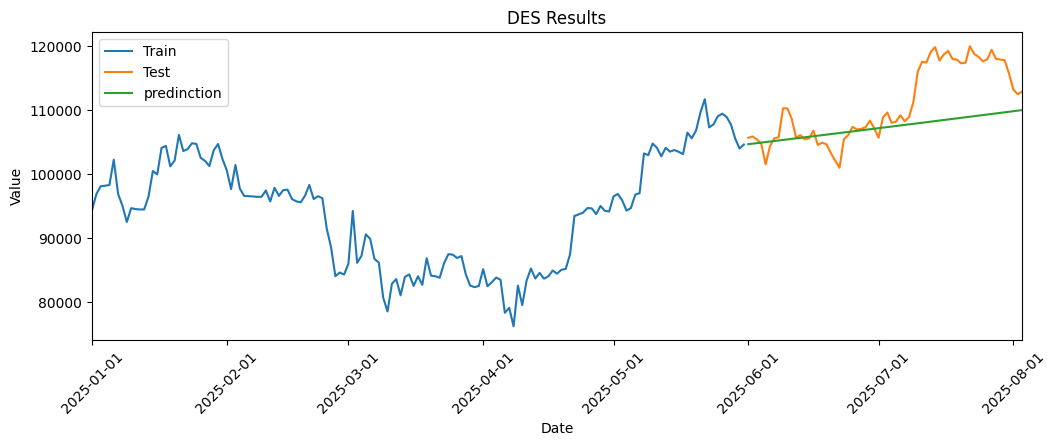

In [ ]:
ax = plot_multiple_series(
    series_dict={
        'Train': X_train['2025-01-01':],
        'Test': X_test,
        'predinction': model2_pred
    },
    title= 'DES Results'
)

## Model Evaluation


In [ ]:
model2_eval= evaluate_forecasts(actual= X_test, predicted= model2_pred)
model2_eval

{'rmse': 5732.94,
 'mae': 4213.9,
 'r2': 0.02,
 'mase': 0.74,
 'mean_test': 110784.73,
 'mean_pred': 107345.94,
 'median_test': 108781.5,
 'median_pred': 107334.57,
 'std_test': 5789.6,
 'std_pred': 1562.73}

# Model 3: Triple Exponential Smoothing

### 📘 Triple Exponential Smoothing (Holt-Winters Method)

**Triple Exponential Smoothing**, also called the **Holt-Winters method**, extends simple and double exponential smoothing by adding a **seasonal component**.  
It is designed to forecast time series data that exhibit **both trend and seasonality**.

---

#### 🔹 When to Use:
In our case, the Bitcoin data does **not** have a strong seasonality component.  
However, let’s see what happens when we implement TES anyway.

---

#### 🔹 How It Works:
The method maintains three components:
- **Level**: $l_t$
- **Trend**: $b_t$
- **Seasonality**: $s_t$

The update equations are:

$$
l_t = \alpha \frac{y_t}{s_{t-m}} + (1 - \alpha)(l_{t-1} + b_{t-1})
$$

$$
b_t = \beta (l_t - l_{t-1}) + (1 - \beta) b_{t-1}
$$

$$
s_t = \gamma \frac{y_t}{l_t} + (1 - \gamma) s_{t-m}
$$

Where:
- $y_t$ is the observed value
- $l_t$ is the level (overall smoothed value)
- $b_t$ is the trend
- $s_t$ is the seasonal component
- $m$ is the length of the seasonality (e.g., 12 for monthly data)
- $\alpha$, $\beta$, $\gamma$ are smoothing parameters in $(0, 1)$

---

#### 🔹 Forecast Formula:
The forecast $h$ steps ahead is:

$$
\hat{y}_{t+h} = (l_t + h \cdot b_t) \cdot s_{t+h-m(k+1)}
$$

Where $k = \lfloor \frac{h-1}{m} \rfloor$

---

#### 🔹 Features:
- Models both **trend** and **seasonality**
- Suitable for cyclic or seasonal patterns
- Very powerful for structured time series

---

#### 🔹 Limitations:
- Overfits if data lacks clear seasonality
- More parameters to tune
- Sensitive to the seasonal period choice

## Building Up The Model

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [ ]:
model3 = ExponentialSmoothing(X_train/70000,
                              trend= 'mul',
                              seasonal= 'add',
                              seasonal_periods=365)
model3_fit = model3.fit()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:85: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


<Axes: title={'center': 'Triple Exponential Smoothing - last 60 days'}, xlabel='Date', ylabel='Value'>

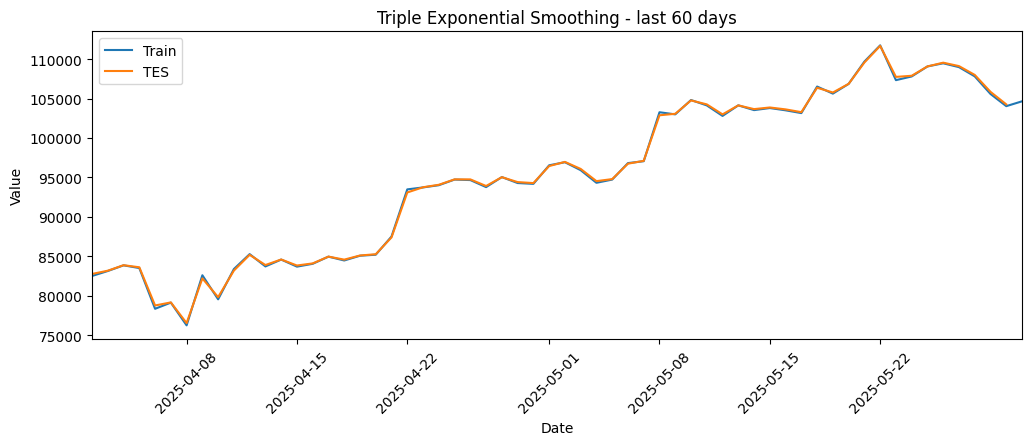

In [ ]:
plot_multiple_series(
    series_dict={
        'Train': X_train.iloc[-60:],
        'TES': model3_fit.fittedvalues.shift(-1).iloc[-60:] * 70000
    },
    title= 'Triple Exponential Smoothing - last 60 days'
)

## Model Prediction

<Axes: title={'center': 'TES Prediction on Test Data'}, xlabel='Date', ylabel='Value'>

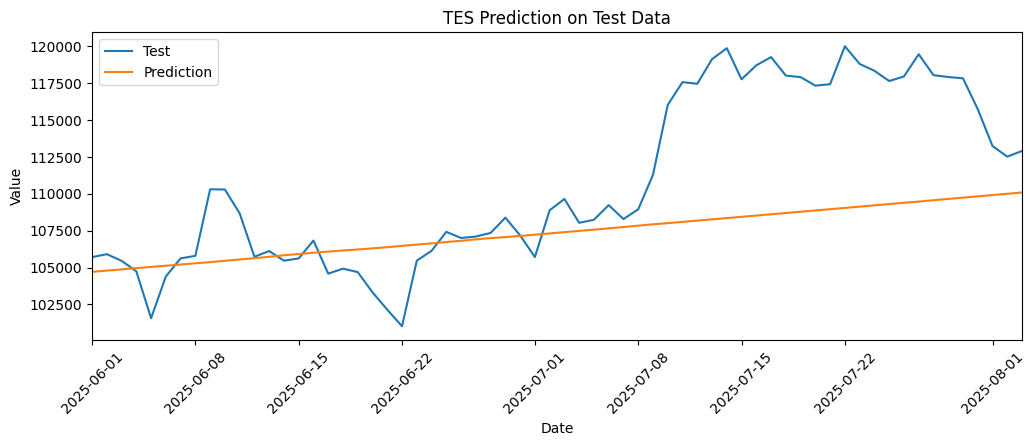

In [ ]:
model3_pred = model3_fit.forecast(len(X_test)) * 70000
plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model3_pred
    },
    title='TES Prediction on Test Data'
)

## Model Evaluation

In [ ]:
model3_eval = evaluate_forecasts(actual= X_test, predicted= model3_pred)
model3_eval

{'rmse': 5705.83,
 'mae': 4192.1,
 'r2': 0.03,
 'mase': 0.73,
 'mean_test': 110784.73,
 'mean_pred': 107378.56,
 'median_test': 108781.5,
 'median_pred': 107356.5,
 'std_test': 5789.6,
 'std_pred': 1576.54}

# Model1 + Model2 + Model3: Summing Up The Exponential Smooting Methods

<Axes: title={'center': 'Exponential Smoothing Models Predictions'}, xlabel='Date', ylabel='Value'>

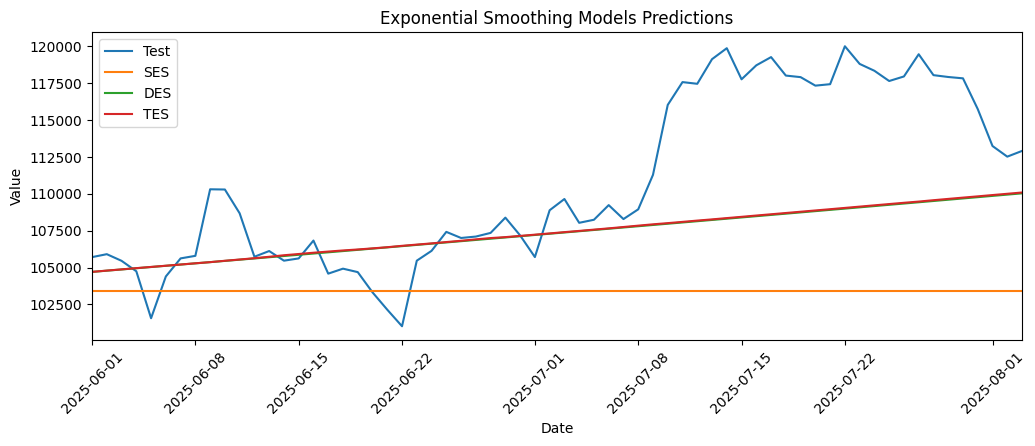

In [ ]:
plot_multiple_series(
    series_dict={
        'Test': X_test,
        'SES': model1_pred,
        'DES': model2_pred,
        'TES': model3_pred,
    },
    title='Exponential Smoothing Models Predictions'
)

#### As I mentioned before, the HP-filter told us that the seasonality component is not strong, so out TES is predicting like DES.

# Model 4: AutoRegressive (AR)

### 📘 AutoRegressive (AR) Model

The **AutoRegressive (AR)** model is one of the foundational models in time series forecasting.  
It assumes that the current value of a time series depends **linearly on its own previous values**.

---

#### 🔹 AR Model Equation:

For an AR model of order $p$ (denoted as AR($p$)), the forecast is:

$$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \epsilon_t
$$

Where:
- $y_t$ is the value at time $t$
- $c$ is a constant term
- $\phi_1, \dots, \phi_p$ are the autoregressive coefficients
- $\epsilon_t$ is white noise (error term)

---

#### 🔹 When to Use AR:
- The data is **stationary** (constant mean and variance over time).
- There is **significant autocorrelation** in the series (visible in ACF plots).
- The data shows **no trend or seasonality**, or those components have been **removed** (e.g., via differencing or decomposition).

---

#### 🧹 Preparing the Data:
Before building an AR model, we must **prepare** the data:
- Check for stationarity (e.g., using Augmented Dickey-Fuller test)
- Apply **differencing** if needed to remove trend or seasonality
- Use **autocorrelation (ACF)** and **partial autocorrelation (PACF)** plots to determine the order $p$

---

Let’s prepare our data and implement the AR model step-by-step.

## Stationarity Test with Augmented Dickey-Fuller (ADF) test

### 📊 Augmented Dickey-Fuller (ADF) Test Parameters Explained

The ADF test is used to check whether a **time series is stationary** (i.e., its statistical properties like mean and variance do not change over time). Here's what each parameter in the test result means:

---

#### 🔹 **ADF Statistic**
- This is the main test statistic.
- It measures how strongly the time series deviates from a unit root (non-stationarity).
- **Interpretation:**
  - If the ADF statistic is **less than** the critical value, the null hypothesis (non-stationary) can be rejected.
  - A **more negative value** indicates stronger evidence against the presence of a unit root (i.e., the data is stationary).

---

#### 🔹 **p-value**
- The probability of observing the data if the **null hypothesis is true** (i.e., the series is non-stationary).
- **Interpretation:**
  - If `p-value < 0.05` (or chosen significance level), reject the null hypothesis → the series is **likely stationary**.
  - If `p-value > 0.05`, fail to reject the null hypothesis → the series is **likely non-stationary**.

---

#### 🔹 **Critical Values**
These are thresholds used to compare with the ADF Statistic at different confidence levels:

- **Critical Value (1%)**: The threshold at a **99% confidence level**.
- **Critical Value (5%)**: The threshold at a **95% confidence level**.
- **Critical Value (10%)**: The threshold at a **90% confidence level**.

**Interpretation:**
- If the ADF statistic is **less than** any of these values, you can reject the null hypothesis at that confidence level.
- For example:
  - `ADF < CV(5%)` → reject null at 95% confidence → data is stationary.

---

#### ✅ Summary

| Parameter        | Tells You About                        |
|------------------|----------------------------------------|
| ADF Statistic     | How strongly data resists stationarity |
| p-value           | Probability of data being non-stationary |
| Critical Values   | Cutoffs for rejecting the null hypothesis |

Use all of these together to determine whether your time series is stationary or needs differencing/transformation.


In [ ]:
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries, verbose=True):
    result = adfuller(timeseries)
    if verbose:
        print(f'ADF Statistic: {result[0]:.4f}')
        print(f'p-value: {result[1]:.4f}')
        for key, value in result[4].items():
            print(f'Critical Value ({key}): {value:.4f}')
    if result[1] < 0.05:
        if verbose:
            print("✅ Series is stationary") if verbose else None
        return True
    else:
        if verbose:
            print("❌ Series is not stationary (has trend/seasonality)") if verbose else None
        return False


In [ ]:
test_stationarity(X_train, verbose= True)

ADF Statistic: 0.3223
p-value: 0.9783
Critical Value (1%): -3.4317
Critical Value (5%): -2.8621
Critical Value (10%): -2.5671
❌ Series is not stationary (has trend/seasonality)


False

In [ ]:
test_stationarity(np.log(X_train), verbose= True) # Sometimes getting log from out training data, can stablize the varience and make the data stationary

ADF Statistic: -2.0854
p-value: 0.2504
Critical Value (1%): -3.4317
Critical Value (5%): -2.8621
Critical Value (10%): -2.5671
❌ Series is not stationary (has trend/seasonality)


False

## Making Data Stationary by Differencing Method

In [ ]:
def make_stationary(timeseries, max_order=100, verbose= True):
    for diff_order in range(max_order):
        if verbose:
            print(f'Trying to make the timeseries stationary with order {diff_order}')

        if diff_order == 0:
            X_train_diff = timeseries.dropna()
        else:
            X_train_diff = X_train.diff(periods= diff_order).dropna()

        result = test_stationarity(X_train_diff, verbose=False)
        if result:
            if verbose:
                print(f'✅ Series is stationary with order {diff_order}')
            return diff_order, X_train_diff

In [ ]:
diff_order, X_train_diff = make_stationary(X_train) # With differencing we make the data stationary so that we can follow the assumptions of the AR model

Trying to make the timeseries stationary with order 0
Trying to make the timeseries stationary with order 1
✅ Series is stationary with order 1


## Transform Back The Differenced Data

In [ ]:
def inverse_difference(forecast, last_ob, diff_order):
    """
    Invert the differenced forecast values to the original scale.

    Parameters:
        last_ob (pd.Series): The last observation(s) from the original time series needed for inversion.
                             Its length should be at least `diff_order`.
        forecast (pd.Series): The differenced forecast values.
        diff_order (int): The order of differencing applied.

    Returns:
        pd.Series: The forecast values in the original scale.
    """
    # Ensure there are enough observations in last_ob for inversion
    if len(last_ob) < diff_order:
        raise ValueError(f"Not enough last observations ({len(last_ob)}) for differencing order {diff_order}. Need at least {diff_order}.")

    inverted = forecast.copy()
    # Invert the differencing
    for i in range(len(inverted)):
        value = inverted.iloc[i]
        for j in range(diff_order):
            # For the first 'diff_order' forecasts, we use the last 'diff_order' actual values
            if i - j - 1 < 0:
                 value += last_ob.iloc[diff_order - (j + 1)]
            # For subsequent forecasts, we use previous inverted forecast values
            else:
                 value += inverted.iloc[i - j - 1]
        inverted.iloc[i] = value
    return inverted


Is `X_train equal` to `X_train_diff_TBack`? (True)



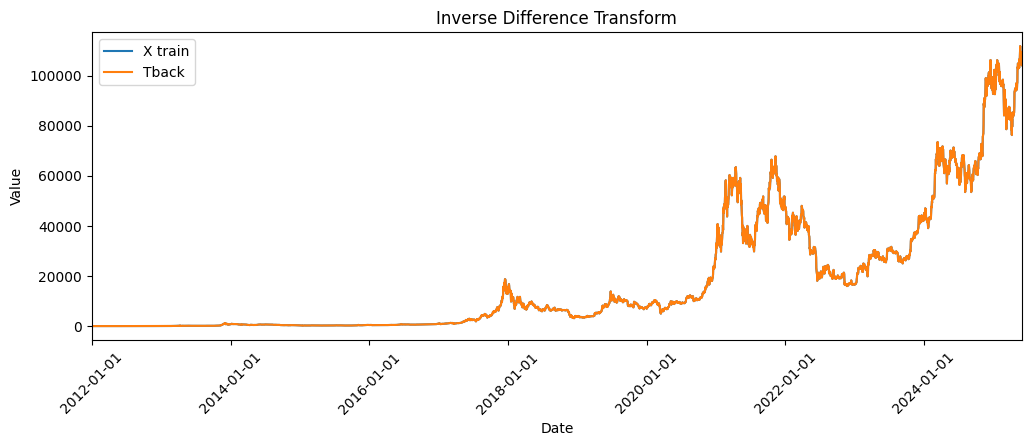

In [ ]:
X_train_diff_tback = inverse_difference(X_train_diff, X_train[:diff_order], diff_order)

plot_multiple_series(
    series_dict={
        'X train': X_train,
        'Tback': X_train_diff_tback
    },
    title= 'Inverse Difference Transform'
    )

# Align indices before comparison
aligned_tback = X_train_diff_tback.reindex(X_train.index)
print(f"\nIs `X_train equal` to `X_train_diff_TBack`? ({np.allclose(X_train[diff_order:], X_train_diff_tback)})\n")

## Determining The Amount Of Lags Needed For Prediction

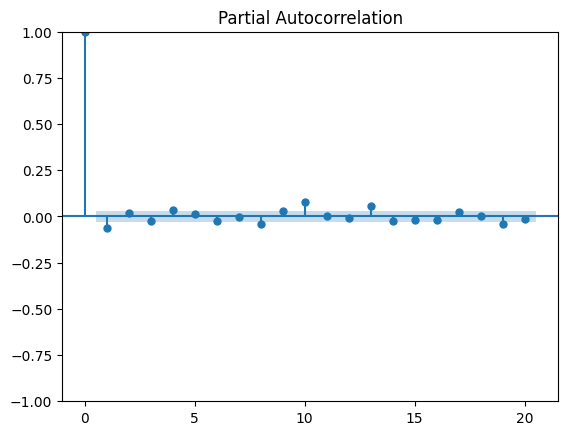

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(X_train_diff, lags=20)
plt.show()

In [ ]:
from statsmodels.tsa.ar_model import ar_select_order

sel_res = ar_select_order(X_train_diff, maxlag=10, trend='ct', seasonal=False, ic='aic')
optimal_lags = sel_res.ar_lags
print(f"Optimal lags selected by AIC: {optimal_lags}")
print("Selected model summary:")
print(sel_res.model.fit().summary()) # Summary of the selected model
print("\n" + "="*30 + "\n")

Optimal lags selected by AIC: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Selected model summary:
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 4899
Model:                    AutoReg(10)   Log Likelihood              -40280.652
Method:               Conditional MLE   S.D. of innovations            916.075
Date:                Sun, 03 Aug 2025   AIC                          80587.305
Time:                        13:20:09   BIC                          80671.736
Sample:                    01-12-2012   HQIC                         80616.930
                         - 05-31-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1394     26.309     -0.765      0.444     -71.704      31.425
trend          0.0167      0.009      1.786  

In [ ]:
sel_res2 = ar_select_order(X_train, maxlag=10, trend='ct', seasonal=False, ic='aic')
optimal_lags2 = sel_res2.ar_lags
print(f"Optimal lags selected by AIC: {optimal_lags2}")
print("Selected model summary:")
print(sel_res2.model.fit().summary()) # Summary of the selected model
print("\n" + "="*30 + "\n")

Optimal lags selected by AIC: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Selected model summary:
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 4900
Model:                    AutoReg(10)   Log Likelihood              -40303.401
Method:               Conditional MLE   S.D. of innovations            918.798
Date:                Sun, 03 Aug 2025   AIC                          80632.803
Time:                        13:20:09   BIC                          80717.237
Sample:                    01-11-2012   HQIC                         80662.429
                         - 05-31-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.9854     30.083     -1.063      0.288     -90.948      26.977
trend          0.0266      0.015      1.725  

In [ ]:
sel_res3 = ar_select_order(np.log(X_train+1e-5), maxlag=10, trend='ct', seasonal=False, ic='aic')
optimal_lags3 = sel_res3.ar_lags
print(f"Optimal lags selected by AIC: {optimal_lags3}")
print("Selected model summary:")
print(sel_res3.model.fit().summary()) # Summary of the selected model
print("\n" + "="*30 + "\n")

Optimal lags selected by AIC: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Selected model summary:
                            AutoReg Model Results                             
Dep. Variable:                  Close   No. Observations:                 4900
Model:                    AutoReg(10)   Log Likelihood                8586.367
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Sun, 03 Aug 2025   AIC                         -17146.734
Time:                        13:20:09   BIC                         -17062.299
Sample:                    01-11-2012   HQIC                        -17117.107
                         - 05-31-2025                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.003      3.131      0.002       0.003       0.014
trend        1.74e-06   1.25e-06      1.394  

## Building Up The Models
We build three modeles:
1. Making the input data *stationary* by difference method
2. Leaving the input data *non-stationary*
3. Making Data *approx stationary* by log variance stabilizer

In [ ]:
from statsmodels.tsa.ar_model import AutoReg

In [ ]:
model41 = AutoReg(X_train_diff, trend= 'ct', lags= optimal_lags)
model41_fit = model41.fit()
model41_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4899
Model:                    AutoReg(10)   Log Likelihood              -40280.652
Method:               Conditional MLE   S.D. of innovations            916.075
Date:                Sun, 03 Aug 2025   AIC                          80587.305
Time:                        13:20:09   BIC                          80671.736
Sample:                    01-12-2012   HQIC                         80616.930
                         - 05-31-2025                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -20.1394     26.309     -0.765      0.444     -71.704      31.425
trend          0.0167      0.009      1.786      0.074      -0.002       0.035
Close.L1      -0.0618      0.014     -4.335      0.000      -0.090      -0.034
Close.L2       0.0218      0.014      1.523      0.128      -0.006       0.050
Close.L3      -0.0230      0.014     -1.612      0.107      -0.051       0.005
Close.L4       0.0401      0.014      2.804      0.005       0.012       0.068
Close.L5       0.0097      0.014      0.679      0.497      -0.018       0.038
Close.L6      -0.0246      0.014     -1.723      0.085      -0.053       0.003
Close.L7      -0.0063      0.014     -0.438      0.661      -0.034       0.022
Close.L8      -0.0417      0.014     -2.916      0.004      -0.070      -0.014
Close.L9       0.0319      0.014      2.227      0.026       0.004       0.060
Close.L10      0.0792      0.014      5.530      0.000       0.051       0.107
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.3014           -0.0000j            1.3014           -0.0000
AR.2             1.0475           -0.7297j            1.2766           -0.0968
AR.3             1.0475           +0.7297j            1.2766            0.0968
AR.4             0.3465           -1.1925j            1.2418           -0.2050
AR.5             0.3465           +1.1925j            1.2418            0.2050
AR.6            -0.4348           -1.2002j            1.2765           -0.3053
AR.7            -0.4348           +1.2002j            1.2765            0.3053
AR.8            -1.1235           -0.6782j            1.3124           -0.4136
AR.9            -1.1235           +0.6782j            1.3124            0.4136
AR.10           -1.3760           -0.0000j            1.3760           -0.5000
------------------------------------------------------------------------------
"""

In [ ]:
model42 = AutoReg(X_train, trend= 'ct', lags= optimal_lags2)
model42_fit = model42.fit()
model42_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4900
Model:                    AutoReg(10)   Log Likelihood              -40303.401
Method:               Conditional MLE   S.D. of innovations            918.798
Date:                Sun, 03 Aug 2025   AIC                          80632.803
Time:                        13:20:10   BIC                          80717.237
Sample:                    01-11-2012   HQIC                         80662.429
                         - 05-31-2025                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.9854     30.083     -1.063      0.288     -90.948      26.977
trend          0.0266      0.015      1.725      0.085      -0.004       0.057
Close.L1       0.9402      0.014     65.774      0.000       0.912       0.968
Close.L2       0.0783      0.020      3.996      0.000       0.040       0.117
Close.L3      -0.0424      0.020     -2.159      0.031      -0.081      -0.004
Close.L4       0.0619      0.020      3.152      0.002       0.023       0.100
Close.L5      -0.0277      0.020     -1.408      0.159      -0.066       0.011
Close.L6      -0.0321      0.020     -1.631      0.103      -0.071       0.006
Close.L7       0.0134      0.020      0.684      0.494      -0.025       0.052
Close.L8      -0.0320      0.020     -1.629      0.103      -0.070       0.006
Close.L9       0.0674      0.020      3.429      0.001       0.029       0.106
Close.L10     -0.0278      0.014     -1.932      0.053      -0.056       0.000
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.2648           -0.4684j            1.3487           -0.4435
AR.2            -1.2648           +0.4684j            1.3487            0.4435
AR.3            -0.6487           -1.2968j            1.4500           -0.3238
AR.4            -0.6487           +1.2968j            1.4500            0.3238
AR.5             0.3287           -1.3791j            1.4177           -0.2128
AR.6             0.3287           +1.3791j            1.4177            0.2128
AR.7             1.0006           -0.0000j            1.0006           -0.0000
AR.8             1.3549           -0.8052j            1.5761           -0.0853
AR.9             1.3549           +0.8052j            1.5761            0.0853
AR.10            1.8850           -0.0000j            1.8850           -0.0000
------------------------------------------------------------------------------
"""

In [ ]:
model43 = AutoReg(np.log(X_train), trend= 'ct', lags= optimal_lags3)
model43_fit = model43.fit()
model43_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4900
Model:                    AutoReg(10)   Log Likelihood                8586.366
Method:               Conditional MLE   S.D. of innovations              0.042
Date:                Sun, 03 Aug 2025   AIC                         -17146.732
Time:                        13:20:10   BIC                         -17062.298
Sample:                    01-11-2012   HQIC                        -17117.106
                         - 05-31-2025                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.003      3.131      0.002       0.003       0.014
trend        1.74e-06   1.25e-06      1.394      0.163   -7.06e-07    4.19e-06
Close.L1       1.0060      0.014     70.429      0.000       0.978       1.034
Close.L2      -0.0559      0.020     -2.759      0.006      -0.096      -0.016
Close.L3       0.0259      0.020      1.276      0.202      -0.014       0.066
Close.L4       0.0323      0.020      1.595      0.111      -0.007       0.072
Close.L5       0.0957      0.020      4.730      0.000       0.056       0.135
Close.L6      -0.0713      0.020     -3.527      0.000      -0.111      -0.032
Close.L7      -0.0606      0.020     -2.996      0.003      -0.100      -0.021
Close.L8      -0.0140      0.020     -0.693      0.488      -0.054       0.026
Close.L9       0.0003      0.020      0.017      0.986      -0.039       0.040
Close.L10      0.0403      0.014      2.829      0.005       0.012       0.068
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0013           -0.0000j            1.0013           -0.0000
AR.2             1.2935           -0.4263j            1.3620           -0.0507
AR.3             1.2935           +0.4263j            1.3620            0.0507
AR.4             0.5037           -1.1638j            1.2681           -0.1850
AR.5             0.5037           +1.1638j            1.2681            0.1850
AR.6            -0.3928           -1.5314j            1.5809           -0.2900
AR.7            -0.3928           +1.5314j            1.5809            0.2900
AR.8            -1.1232           -0.9224j            1.4534           -0.3906
AR.9            -1.1232           +0.9224j            1.4534            0.3906
AR.10           -1.5724           -0.0000j            1.5724           -0.5000
------------------------------------------------------------------------------
"""

<Axes: title={'center': 'Time Series Comparison'}, xlabel='Date', ylabel='Value'>

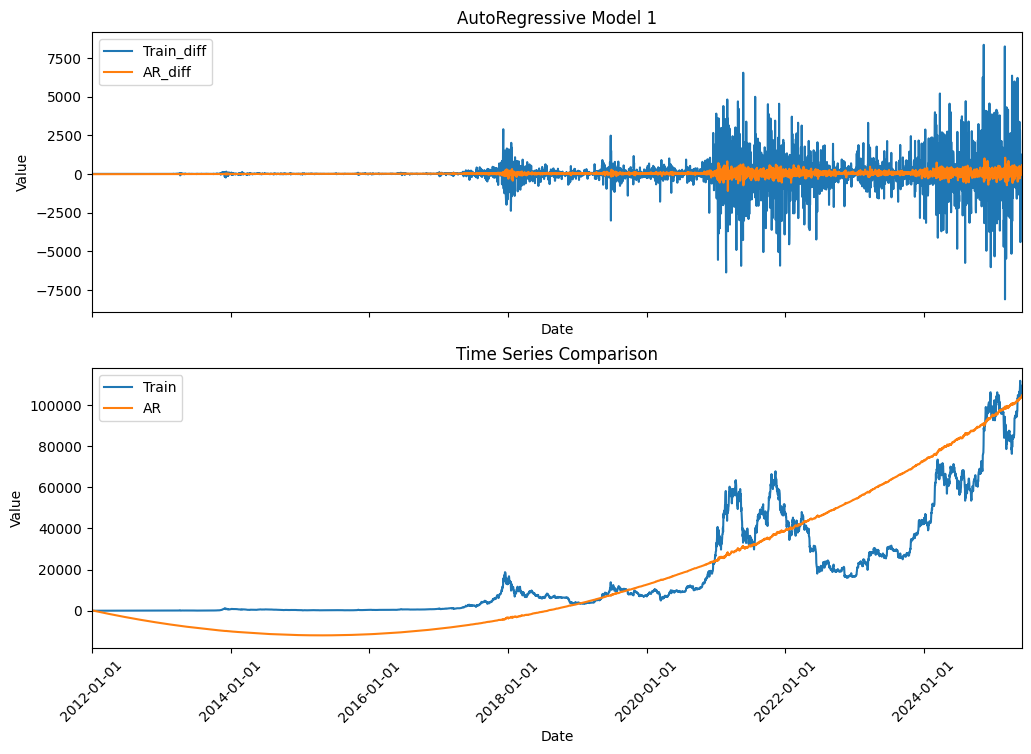

In [ ]:
fitted_diff = model41_fit.fittedvalues
fitted_values = inverse_difference(fitted_diff, X_train.iloc[:diff_order], diff_order)

fig, axes = plt.subplots(2,1, figsize= (12,8), sharex= True)
plot_multiple_series(
    series_dict={
        'Train_diff': X_train_diff,
        'AR_diff': fitted_diff
    },
    ax= axes[0],
    title='AutoRegressive Model 1'
)

plot_multiple_series(
    series_dict={
        'Train': X_train,
        'AR': fitted_values
    },
    ax= axes[1]
)

<Axes: title={'center': 'AutoRegressive Model 2'}, xlabel='Date', ylabel='Value'>

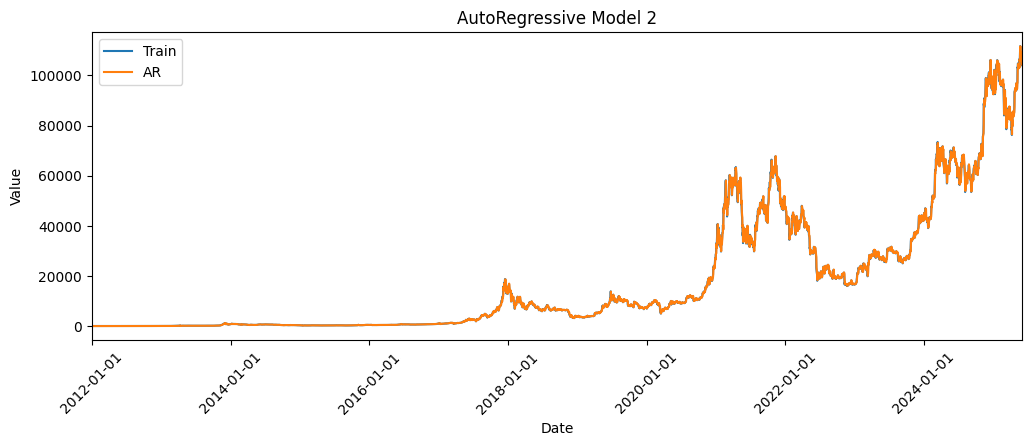

In [ ]:
fitted_values2 = model42_fit.fittedvalues


plot_multiple_series(
    series_dict={
        'Train': X_train,
        'AR': fitted_values2
    },
    title= 'AutoRegressive Model 2'
)

<Axes: title={'center': 'AutoRegressive Model 3'}, xlabel='Date', ylabel='Value'>

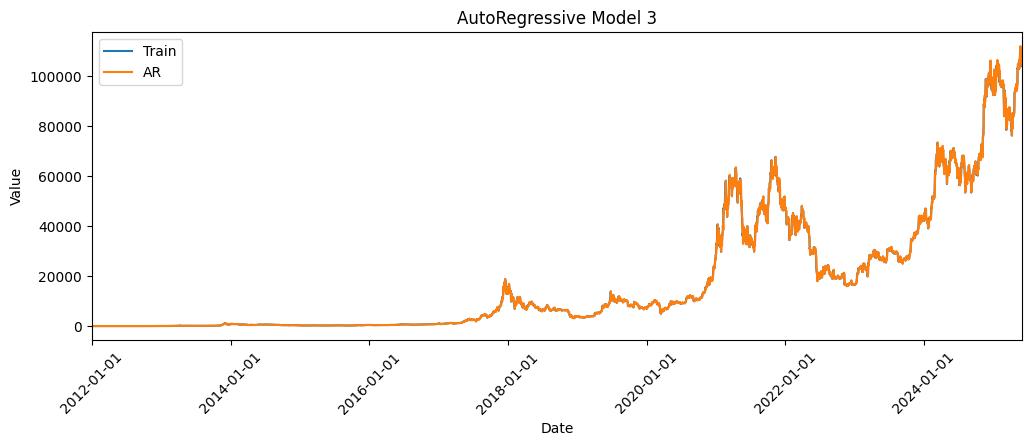

In [ ]:
fitted_values3 = np.exp(model43_fit.fittedvalues)


plot_multiple_series(
    series_dict={
        'Train': X_train,
        'AR': fitted_values3
    },
    title= 'AutoRegressive Model 3'
)

## Model Prediction

<Axes: title={'center': 'AutoRegressive Model 1'}, xlabel='Date', ylabel='Value'>

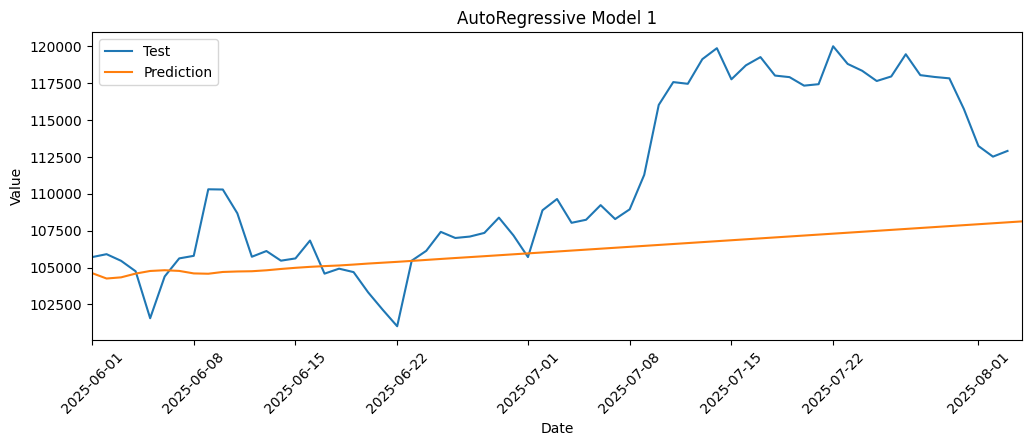

In [ ]:
model41_pred_ = model41_fit.predict(start= len(X_train)-diff_order, end= len(X_train) + len(X_test) - 1)

last_ob_pred = X_train.iloc[-diff_order:]
model41_pred = inverse_difference(model41_pred_, last_ob_pred, diff_order)


plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model41_pred
    },
    title='AutoRegressive Model 1'
    )

<Axes: title={'center': 'AutoRegressive Model 2'}, xlabel='Date', ylabel='Value'>

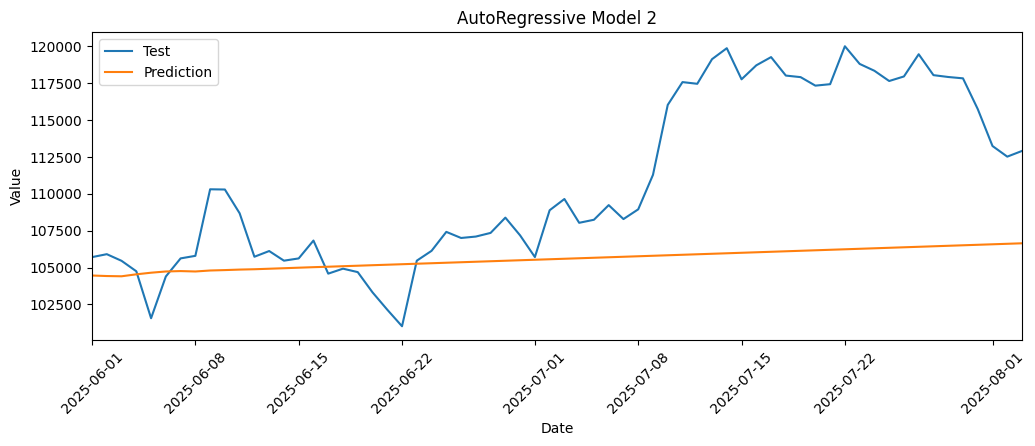

In [ ]:
model42_pred = model42_fit.predict(start= len(X_train), end= len(X_train) + len(X_test) - 1)


plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model42_pred
    },
    title='AutoRegressive Model 2'
    )

<Axes: title={'center': 'AutoRegressive Model 3'}, xlabel='Date', ylabel='Value'>

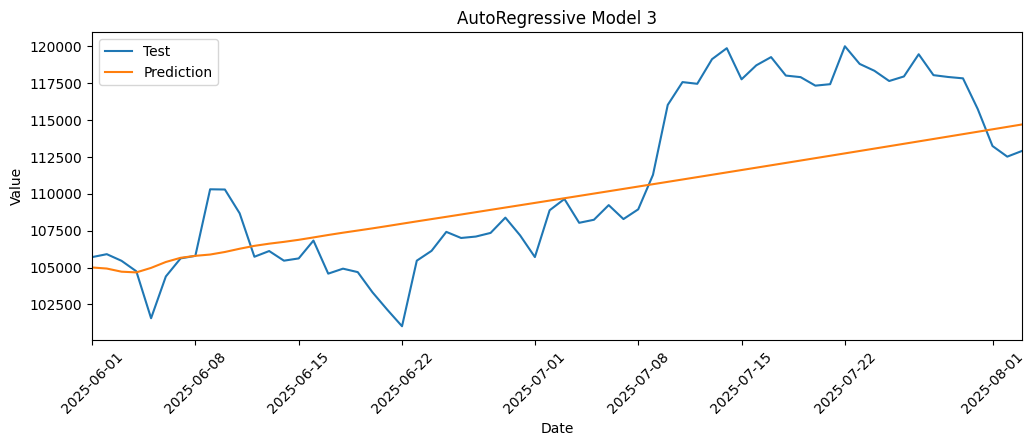

In [ ]:
model43_pred = np.exp(model43_fit.predict(start= len(X_train), end= len(X_train) + len(X_test) - 1))


plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model43_pred
    },
    title='AutoRegressive Model 3'
    )

## Model Evaluation

In [ ]:
model41_eval = evaluate_forecasts(X_test, model41_pred[diff_order:], training_series= X_train) # Evaluate the model with stationary input data
model41_eval

{'rmse': 6740.26,
 'mae': 5102.42,
 'r2': -0.36,
 'mase': 0.79,
 'mean_test': 110784.73,
 'mean_pred': 106154.89,
 'median_test': 108781.5,
 'median_pred': 106117.56,
 'std_test': 5789.6,
 'std_pred': 1127.32}

In [ ]:
model42_eval = evaluate_forecasts(X_test, model42_pred, training_series= X_train) # Evaluate the model with non-stationary input data
model42_eval

{'rmse': 7421.24,
 'mae': 5637.08,
 'r2': -0.64,
 'mase': 0.87,
 'mean_test': 110784.73,
 'mean_pred': 105572.54,
 'median_test': 108781.5,
 'median_pred': 105577.29,
 'std_test': 5789.6,
 'std_pred': 633.71}

> AR Model needs stationary data. In the case of non-stationarity we see that AR model, performs worse

In [ ]:
model43_eval = evaluate_forecasts(X_test, model43_pred, training_series= np.log(X_train+1e-5)) # Evaluate the model with approx-stationary input data -> `Stabilized Variance`
model43_eval

{'rmse': 3924.01,
 'mae': 3150.15,
 'r2': 0.54,
 'mase': 0.03,
 'mean_test': 110784.73,
 'mean_pred': 109638.74,
 'median_test': 108781.5,
 'median_pred': 109620.66,
 'std_test': 5789.6,
 'std_pred': 2948.32}

> The best model among these three models, is the model with **Log-Var-Stabilizer**

# Model 5: AutoRegressive Integrated Moving Average (ARIMA)

### 📘 ARIMA Model Overview

**ARIMA** (AutoRegressive Integrated Moving Average) is a widely-used time series forecasting model that handles non-stationary data by combining:

- **Autoregression (AR)**: Uses past values to predict the current value.
- **Integration (I)**: Applies differencing to remove trend and make the data stationary.
- **Moving Average (MA)**: Uses past forecast errors to improve predictions.

---

### 🧠 Model Structure: `ARIMA(p, d, q)`

- **p**: Number of autoregressive lags (AR terms)
- **d**: Number of differences needed to make the series stationary
- **q**: Number of lagged forecast errors in the prediction equation (MA terms)

---

### ✅ When to Use ARIMA

Use ARIMA when:

- You are modeling a **univariate** time series.
- The series shows a **trend** or is **non-stationary**.
- There is **no strong seasonality**. (For seasonal data, use **SARIMA**.)

---

### 🔁 Differencing (`d`) and Stationarity

Differencing helps stabilize the mean of a time series by removing trend or seasonality:

\[
Y'_t = Y_t - Y_{t-1}
\]

Use tests like the **Augmented Dickey-Fuller (ADF)** test to check if the series is stationary.

---

### 🔐 Log Transformation: When and Why to Use It

Applying a **log transformation** (e.g., `np.log(y)`) can be extremely helpful in the following cases:

- 📈 **Exponential Growth**: Many real-world processes (e.g., stock prices, population growth, crypto prices) grow exponentially. Logging linearizes this trend, making it easier to model.
- 📉 **Reducing Skewness**: Log transforms make the data more symmetric and reduce the influence of large outliers.
- 📉 **Stabilizing Variance** (Heteroscedasticity): If variance increases with the level of the series, a log transform can flatten it, making the ARIMA model assumptions more valid.

#### Example:
If your Bitcoin prices show explosive growth, modeling `np.log(price)` instead of `price` helps the ARIMA model produce more reliable and interpretable results.

---

### ⚠️ Notes & Warnings

- 🚫 **Do not manually difference your data** if you're using `statsmodels.ARIMA`. Just set the `d` parameter and the model will handle it internally.
- ⚠️ If `d > 0`, using `trend='c'` or `trend='ct'` will raise an error — because differencing removes constant components.
  - ✅ Use `trend='t'` (linear trend) or `trend=None` instead.
- 📈 `ARIMA.predict()` and `ARIMA.forecast()` return predictions in the **original (undifferenced) scale**, so **you don't need to manually invert differencing**.
- 📦 If you trained the model on **log-transformed data**, apply `np.exp()` to your forecasts to return to the original scale.

---

### 📌 Tip: Bias-Corrected Log Forecast

When forecasting from log-space, use this correction for better accuracy:

```python
forecast = np.exp(log_forecast + 0.5 * model_fit.resid.var())


## Auto ARIMA Function:
we can have the auto_arima function directly from *pmdarima* library but here I implemented the function usin *ChatGPT* to be statsmodels-pure code

In [ ]:
import warnings
import numpy as np
import pandas as pd
from tqdm import tqdm
from itertools import product
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA

def determine_d(series, max_d=2, significance=0.05):
    """Use ADF test to determine number of differences needed to make series stationary."""
    for d in range(max_d + 1):
        diffed = series.diff(d).dropna() if d > 0 else series.dropna()
        pval = adfuller(diffed)[1]
        if pval < significance:
            return d
    return max_d

def auto_arima_statsmodels(
    y,
    p_range=range(0, 5),
    d=None,
    q_range=range(0, 5),
    seasonal=False,
    m=1,
    P_range=range(0, 2),
    D=None,
    Q_range=range(0, 2),
    max_order=10,
    ic='aic',
    max_d=2,
    max_D=1,
    verbose=True,
    return_all=False
):
    """
    A pure `statsmodels` implementation of an auto-ARIMA model selector.

    Automatically selects the best ARIMA or SARIMA model for a univariate time series
    using grid search and information criteria (AIC or BIC).

    Parameters
    ----------
    y : array-like or pd.Series
        The univariate time series data to fit the model to. Must not contain NaNs.

    p_range : range or iterable of ints, default=range(0, 5)
        The range of autoregressive (AR) terms `p` to consider.

    d : int or None, default=None
        The degree of differencing to make the series stationary. If None, it is determined
        automatically using the Augmented Dickey-Fuller test.

    q_range : range or iterable of ints, default=range(0, 5)
        The range of moving average (MA) terms `q` to consider.

    seasonal : bool, default=False
        Whether to perform seasonal ARIMA (SARIMA) modeling. If False, non-seasonal ARIMA is used.

    m : int, default=1
        The number of periods in each season. For example, `m=12` for monthly data with yearly seasonality,
        or `m=7` for daily data with weekly seasonality.

    P_range : range or iterable of ints, default=range(0, 2)
        The range of seasonal autoregressive (SAR) terms `P` to consider.
        Only used if `seasonal=True`.

    D : int or None, default=None
        The degree of seasonal differencing. If None, it is estimated using ADF test on the seasonal differenced series.
        Only used if `seasonal=True`.

    Q_range : range or iterable of ints, default=range(0, 2)
        The range of seasonal moving average (SMA) terms `Q` to consider.
        Only used if `seasonal=True`.

    max_order : int, default=10
        The maximum allowed sum of all order terms (p + d + q + P + D + Q).
        This prevents overfitting and long training times.

    ic : {'aic', 'bic'}, default='aic'
        The information criterion used to evaluate model quality. Lower is better.
        Acceptable values: `'aic'` or `'bic'`.

    max_d : int, default=2
        The maximum number of differences to test for non-seasonal `d` selection (if `d=None`).

    max_D : int, default=1
        The maximum number of seasonal differences to test for `D` (if `D=None` and `seasonal=True`).

    verbose : bool, default=True
        Whether to show progress and selected hyperparameters during the search.

    return_all : bool, default=False
        If True, returns a tuple of:
            (best_model, best_order, all_results)
        where `all_results` is a list of all models and scores.

    Returns
    -------
    model : statsmodels.tsa.arima.model.ARIMAResults
        The best-fitted ARIMA/SARIMA model according to the selected information criterion.

    best_order : tuple (only if return_all=True)
        The order or seasonal order combination that produced the best model.

    all_results : list of (score, order, fitted_model) (only if return_all=True)
        All attempted models with their information criterion scores.

    Notes
    -----
    - This function performs an exhaustive grid search, so it may be slow for large search spaces.
    - It ignores models that fail to converge or exceed the `max_order` constraint.
    - Seasonal models are estimated only if `seasonal=True`.

    Example
    -------
    >>> best_model = auto_arima_statsmodels(y, p_range=range(0, 3), q_range=range(0, 3))
    >>> print(best_model.summary())
    """
    y = pd.Series(y).dropna()

    if d is None:
        d = determine_d(y, max_d=max_d)
        if verbose: print(f"Determined d = {d}")
    if seasonal and D is None:
        D = determine_d(y.diff(d).dropna().resample(f'{m}D').mean().dropna(), max_d=max_D)
        if verbose: print(f"Determined D = {D}")

    # Parameter grids
    if seasonal:
        param_grid = list(product(p_range, q_range, P_range, Q_range))
    else:
        param_grid = list(product(p_range, q_range))

    best_score = np.inf
    best_cfg = None
    best_model = None
    all_results = []

    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        for params in tqdm(param_grid, disable=not verbose):
            try:
                if seasonal:
                    p, q, P, Q = params
                    total_order = p + q + d + P + Q + D
                    if total_order > max_order:
                        continue
                    model = ARIMA(
                        y,
                        order=(p, d, q),
                        seasonal_order=(P, D, Q, m),
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    fit = model.fit()
                else:
                    p, q = params
                    total_order = p + q + d
                    if total_order > max_order:
                        continue
                    model = ARIMA(
                        y,
                        order=(p, d, q),
                        enforce_stationarity=False,
                        enforce_invertibility=False
                    )
                    fit = model.fit()

                score = getattr(fit, ic)
                all_results.append((score, params, fit))
                if score < best_score:
                    best_score = score
                    best_cfg = params
                    best_model = fit

            except Exception:
                continue

    if verbose:
        print(f"\n✅ Best {ic.upper()}: {best_score:.2f} with order: {best_cfg}")

    if return_all:
        return best_model, best_cfg, all_results
    return best_model

In [ ]:
model5_fit = auto_arima_statsmodels(np.log(X_train), # Since our trend has exponential growth, the best we can do is taking the `log`
                                    seasonal = False,
                                    p_range= range(0,3),
                                    q_range= range(0,3),
                                    max_order= 10,
                                    verbose= True)
model5_fit.summary()

Determined d = 1


100%|██████████| 9/9 [00:08<00:00,  1.03it/s]


✅ Best AIC: -17128.17 with order: (2, 2)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4900
Model:                 ARIMA(2, 1, 2)   Log Likelihood                8569.083
Date:                Sun, 03 Aug 2025   AIC                         -17128.165
Time:                        13:20:23   BIC                         -17095.684
Sample:                    01-01-2012   HQIC                        -17116.769
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7054      0.019     37.193      0.000       0.668       0.743
ar.L2         -0.8593      0.021    -39.993      0.000      -0.901      -0.817
ma.L1         -0.8745      0.027    -32.849      0.000      -0.927      -0.822
ma.L2          1.2603      0.040     31.857      0.000       1.183       1.338
sigma2         0.0011   7.44e-05     14.939      0.000       0.001       0.001
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):            218962.08
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):               0.41   Skew:                            -1.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        35.56
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Building Up The Model

In [ ]:
model5 = ARIMA(np.log(X_train), order= (2,1,2), trend='t') # Because of the exponential growth in the trend, taking `log` make our prediction better as in `model43`
model5_fit = model5.fit()
model5_fit.summary()

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                 4900
Model:                 ARIMA(2, 1, 2)   Log Likelihood                8546.246
Date:                Sun, 03 Aug 2025   AIC                         -17080.493
Time:                        13:20:27   BIC                         -17041.512
Sample:                    01-01-2012   HQIC                        -17066.816
                         - 05-31-2025                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.0020      0.001      3.301      0.001       0.001       0.003
ar.L1          0.0077      0.166      0.046      0.963      -0.317       0.333
ar.L2         -0.0268      0.168     -0.160      0.873      -0.356       0.302
ma.L1          0.0072      0.167      0.043      0.966      -0.320       0.335
ma.L2         -0.0268      0.169     -0.159      0.874      -0.357       0.304
sigma2         0.0018   1.36e-05    131.657      0.000       0.002       0.002
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):            227265.21
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                            -1.83
Prob(H) (two-sided):                  0.00   Kurtosis:                        36.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: title={'center': 'ARIMA Model'}, xlabel='Date', ylabel='Value'>

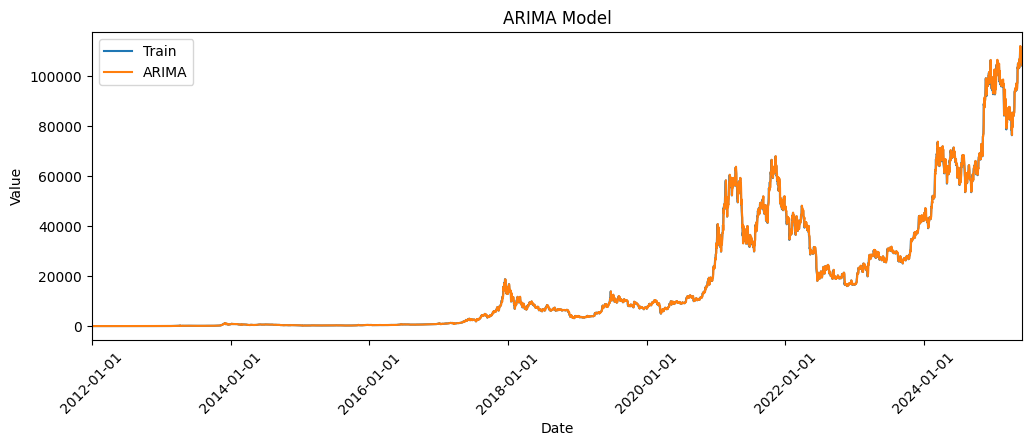

In [ ]:
plot_multiple_series(
    series_dict={
        'Train': X_train,
        'ARIMA': np.exp(model5_fit.fittedvalues)
    },
    title= 'ARIMA Model'
)

**Sometimes we might use `np.exp(log_forecast + 0.5 * model_fit.resid.var())` instead of `np.exp(log_forecast)`!**

📐 What Does `np.exp(log_forecast + 0.5 * model_fit.resid.var())` Do?

When using ARIMA on log-transformed data (e.g., np.log(y)), the model makes predictions in the log scale.

To return forecasts to the original scale:

- Naive inverse:
    forecast = np.exp(log_forecast)
    → This gives the **median** of the forecast distribution on the original scale.

- Bias-corrected inverse:
    forecast = np.exp(log_forecast + 0.5 * model_fit.resid.var())
    → This gives the **mean** (expected value) of the forecast assuming the residuals follow a normal distribution.

Mathematically, if X ~ N(μ, σ²), then:
    E[e^X] = e^(μ + 0.5 * σ²)

So, when residuals are approximately normal and homoscedastic, we correct for the log-normal bias using:
    np.exp(log_forecast + 0.5 * residual_variance)

✅ Use the bias-corrected forecast if:
- You trained the model on log(y)
- You want the expected (mean) value on the original scale
- Residuals appear normal and constant in variance

🧪 Summary:
- np.exp(log_forecast)                → median forecast (default)
- np.exp(log_forecast + 0.5 * σ²)     → mean forecast (bias-corrected)

Use this ti check whether the `Residuals` are normal or not:
```python
resid = model_fit.resid
sns.histplot(resid, bins=40, kde=True)
plt.title("Histogram of Residuals")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.show()
```

## Model Prediction

<Axes: title={'center': 'ARIMA Model'}, xlabel='Date', ylabel='Value'>

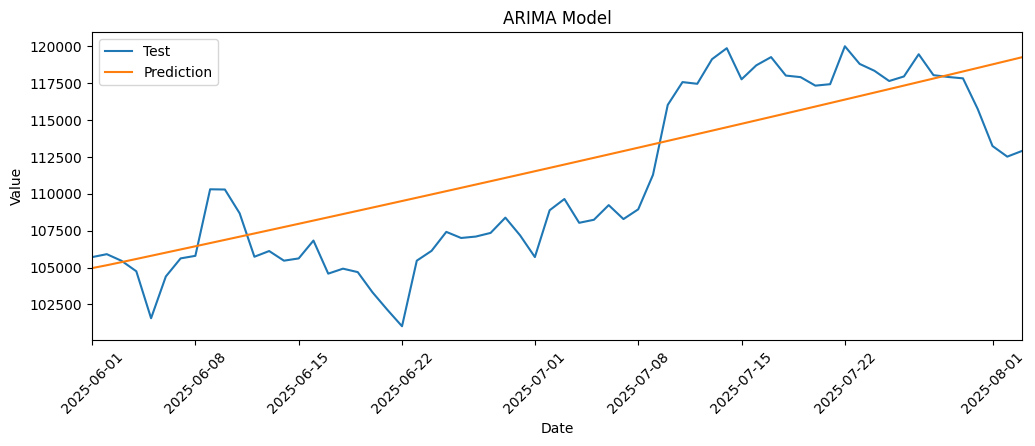

In [ ]:
model5_pred = np.exp(model5_fit.predict(start= len(X_train), end= len(X_train) + len(X_test) - 1))


plot_multiple_series(
    series_dict={
        'Test': X_test,
        'Prediction': model5_pred
    },
    title='ARIMA Model'
    )

## Model Evaluation

In [ ]:
model5_eval = evaluate_forecasts(X_test, model5_pred, training_series= np.log(X_train))
model5_eval

{'rmse': 3520.3,
 'mae': 3009.1,
 'r2': 0.63,
 'mase': 0.03,
 'mean_test': 110784.73,
 'mean_pred': 111952.43,
 'median_test': 108781.5,
 'median_pred': 111873.36,
 'std_test': 5789.6,
 'std_pred': 4199.85}

> It out-perform the `model43` in evaluation!

# Model 6: Seasonal ARIMA (SARIMA)

### 📘 SARIMA Model Overview

**SARIMA** (Seasonal AutoRegressive Integrated Moving Average) extends ARIMA by incorporating **seasonality**.
It is especially useful when your time series has repeating patterns at fixed intervals (e.g., daily, weekly, monthly, yearly).

---

### 🧠 Model Structure: SARIMA(p, d, q)(P, D, Q, s)

- (p, d, q): Non-seasonal ARIMA components
    • p: Number of autoregressive terms
    • d: Number of differencing steps to achieve stationarity
    • q: Number of moving average terms

- (P, D, Q, s): Seasonal components
    • P: Seasonal autoregressive terms
    • D: Seasonal differencing steps
    • Q: Seasonal moving average terms
    • s: Season length (e.g., s=12 for monthly data with yearly seasonality)

---

### ✅ When to Use SARIMA

Use SARIMA when:
- Your time series shows **clear, repeating seasonal patterns**
- There is also **trend** or **non-stationarity**
- You want a model that captures **both short-term dynamics and seasonal cycles**

---

### 🔁 Differencing in SARIMA

- `d`: removes non-seasonal trend
- `D`: removes seasonal trend (e.g., annual pattern)
- Use ADF test or visual inspection to determine the need for differencing

---

### ⚠️ Notes & Best Practices

- Set the seasonal period `s` carefully. Common values:
    • Daily data with weekly seasonality → s = 7  
    • Monthly data with yearly seasonality → s = 12  
    • Hourly data with daily seasonality → s = 24  

- Avoid overfitting: total order (p + q + P + Q + d + D) should not be too large

- You can tune hyperparameters using grid search or `auto_arima` if available

- `statsmodels` provides SARIMA through the `SARIMAX` model class, which supports:
    • Seasonal ARIMA terms
    • Exogenous variables (optional)
    • Time-varying coefficients

---

### 📦 Model Fitting in statsmodels

Example:
```python
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(y, order=(p,d,q), seasonal_order=(P,D,Q,s))
fit = model.fit()
fit.summary()
```

## Building Up The Model

Our data shows weak seasonality part, but let's try the `SERIMAX`.

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

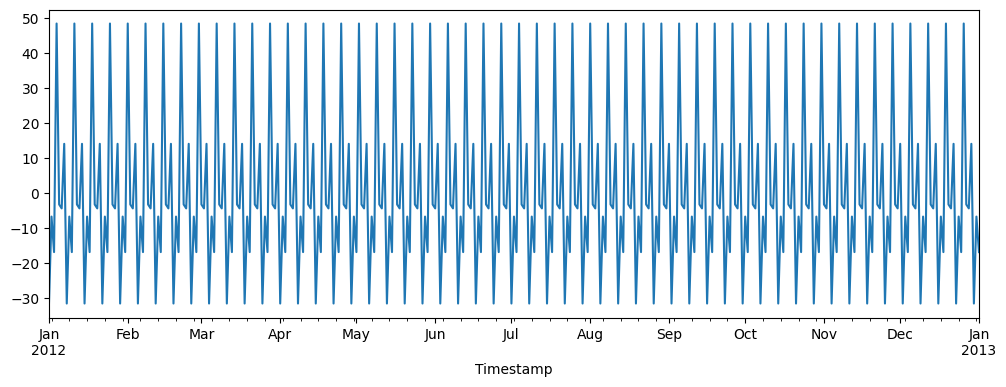

In [ ]:
decompose = seasonal_decompose(X_train)
decompose.seasonal.loc['2012-01-01':'2013-01-01'].plot(figsize= (12,4)); # Let's find out the period of seasonality

In [ ]:
model6_fit = auto_arima_statsmodels(
    X_train,
    p_range=range(1, 3),
    d=None,
    q_range=range(1, 3),
    seasonal=True,
    m=30,
    P_range=range(0, 2),
    D=None,
    Q_range=range(0, 2),
    max_order=10,
    ic='aic',
    max_d=2,
    max_D=1,
    verbose=True,
    return_all=False
    )
model6_fit.summary()

Determined d = 1
Determined D = 0


100%|██████████| 16/16 [01:44<00:00,  6.55s/it]



✅ Best AIC: 80263.44 with order: (1, 2, 0, 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 4900
Model:             ARIMA(1, 1, 2)x(0, 0, [1], 30)   Log Likelihood              -40126.720
Date:                            Sun, 03 Aug 2025   AIC                          80263.441
Time:                                    13:22:13   BIC                          80295.891
Sample:                                01-01-2012   HQIC                         80274.830
                                     - 05-31-2025                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5889      0.130     -4.539      0.000      -0.843      -0.335
ma.L1          0.5306      0.130      4.067      0.000       0.275       0.786
ma.L2         -0.0038      0.013     -0.301      0.764      -0.029       0.021
ma.S.L30       0.0476      0.008      6.324      0.000       0.033       0.062
sigma2      8.493e+05   5912.646    143.649      0.000    8.38e+05    8.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             45183.22
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):            6840.56   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        17.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
model6 = SARIMAX(X_train, order= (1, 1, 2), seasonal_order= (0, 0, 1, 30))
model6_fit = model6.fit()
model6_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                Close   No. Observations:                 4900
Model:             SARIMAX(1, 1, 2)x(0, 0, [1], 30)   Log Likelihood              -40382.297
Date:                              Sun, 03 Aug 2025   AIC                          80774.593
Time:                                      13:22:19   BIC                          80807.077
Sample:                                  01-01-2012   HQIC                         80785.990
                                       - 05-31-2025                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5936      0.129     -4.617      0.000      -0.846      -0.342
ma.L1          0.5353      0.129      4.140      0.000       0.282       0.789
ma.L2         -0.0042      0.013     -0.330      0.742      -0.029       0.021
ma.S.L30       0.0474      0.008      6.310      0.000       0.033       0.062
sigma2      8.493e+05   5911.431    143.677      0.000    8.38e+05    8.61e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             46233.97
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):            7011.05   Skew:                             0.17
Prob(H) (two-sided):                  0.00   Kurtosis:                        18.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: title={'center': 'SARIMAX'}, xlabel='Date', ylabel='Value'>

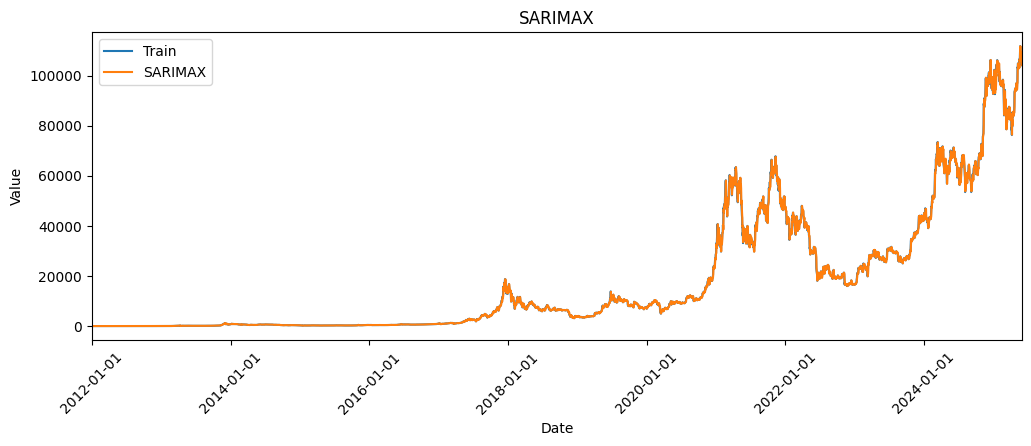

In [ ]:
plot_multiple_series(
    series_dict={
        'Train': X_train,
        'SARIMAX': model6_fit.fittedvalues
    },
    title= 'SARIMAX'
)

## Model Prediction

<Axes: title={'center': 'SARIMAX Prediction'}, xlabel='Date', ylabel='Value'>

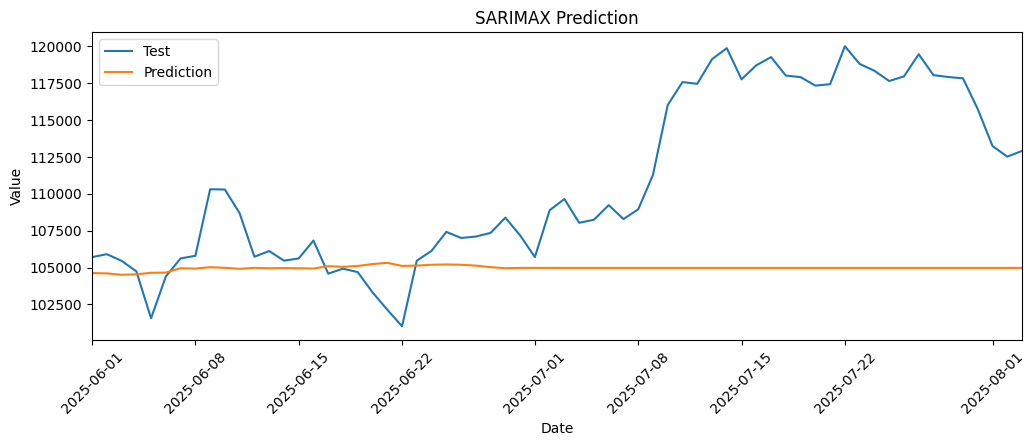

In [ ]:
model6_pred = model6_fit.predict(start= len(X_train), end= len(X_train)+ len(X_test)-1)

plot_multiple_series(
    series_dict= {
        'Test': X_test,
        'Prediction': model6_pred
    },
    title= 'SARIMAX Prediction'
)

## Model Evaluation

In [ ]:
model6_eval = evaluate_forecasts(X_test, model6_pred, training_series= X_train)
model6_eval

{'rmse': 8204.09,
 'mae': 6241.75,
 'r2': -1.01,
 'mase': 0.96,
 'mean_test': 110784.73,
 'mean_pred': 104967.53,
 'median_test': 108781.5,
 'median_pred': 104973.43,
 'std_test': 5789.6,
 'std_pred': 144.07}

# Usefull Functions 2

## Initiate CallBacks

In [ ]:
import datetime

class ModelCallbacks:
    """
    A utility class for creating and managing common Keras training callbacks:
    - TensorBoard logging
    - Model checkpointing
    - Early stopping

    Attributes:
        tensorboard_callback (tf.keras.callbacks.TensorBoard): Callback for logging to TensorBoard.
        checkpoint_callback (tf.keras.callbacks.ModelCheckpoint): Callback for saving model checkpoints.
        early_stopping_callback (tf.keras.callbacks.EarlyStopping): Callback for early stopping during training.

    """

    def __init__(self, verbose=True):
        """
        Initialize the callback container.

        Args:
            verbose (bool): Whether to print status messages during setup.
        """
        self.tensorboard_callback = None
        self.checkpoint_callback = None
        self.early_stopping_callback = None
        self.reduce_lr_callback = None
        self.verbose = verbose

    def tensorboard(self, dir_name, experiment_name):
        """
        Create and store a TensorBoard callback.

        Args:
            dir_name (str): Root directory where logs should be saved.
            experiment_name (str): Subfolder name to distinguish experiments.
        """
        log_dir = os.path.join(
            dir_name,
            experiment_name,
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
        )
        self.tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir)

        if self.verbose:
            print(f"[TensorBoard] Log files will be saved to: {log_dir}")

    def checkpoint(self, dir_name, experiment_name, save_best_only=True, monitor='val_loss'):
        """
        Create and store a model checkpoint callback that saves only weights.

        Args:
            filepath (str): Filepath where the weights will be saved.
            save_best_only (bool): Whether to save only the best model (based on monitored metric).
            monitor (str): Metric to monitor for determining the best model.
        """
        # Creating a filepath
        filepath= os.path.join(
            dir_name,
            experiment_name,
            datetime.datetime.now().strftime("%Y%m%d-%H%M%S")+'.weights.h5'
        )

        # Make sure the directory exists
        os.makedirs(os.path.dirname(filepath), exist_ok=True)

        self.checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
            filepath=filepath,
            save_weights_only=True,  # <== Only weights, not full model
            save_best_only=save_best_only,
            monitor=monitor,
            verbose=1 if self.verbose else 0
        )
        if self.verbose:
            print(f"[Checkpoint] Saving only weights to: {filepath} (monitoring '{monitor}')")

    def early_stopping(self, patience=5, monitor='val_loss', restore_best_weights=True):
        """
        Create and store an early stopping callback.

        Args:
            patience (int): Number of epochs to wait for improvement before stopping.
            monitor (str): Metric to monitor for improvement.
            restore_best_weights (bool): Whether to restore model weights from the epoch with the best value of the monitored quantity.
        """
        self.early_stopping_callback = tf.keras.callbacks.EarlyStopping(
            patience=patience,
            monitor=monitor,
            restore_best_weights=restore_best_weights,
            verbose=1 if self.verbose else 0
        )
        if self.verbose:
            print(f"[EarlyStopping] Will stop if no improvement in '{monitor}' for {patience} epochs.")

    def reduce_lr(self, factor=0.1, patience=10, monitor='val_loss', min_lr=0.0):
        """
        Configure a ReduceLROnPlateau callback to reduce the learning rate
        when a monitored metric has stopped improving.

        Args:
            factor (float, optional): Factor by which the learning rate will be
                reduced. new_lr = lr * factor. Must be greater than 0. Default is 0.1.
            patience (int, optional): Number of epochs with no improvement
                after which learning rate will be reduced. Default is 10.
            monitor (str, optional): Quantity to be monitored. Typically 'val_loss'
                or 'loss'. Default is 'val_loss'.
            min_lr (float, optional): Lower bound on the learning rate. Learning rate
                will not be reduced below this value. Default is 0.0.
        """

        self.reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
            monitor=monitor,
            factor=factor,
            patience=patience,
            verbose=0,
            mode='auto',
            min_delta=0.0001,
            cooldown=0,
            min_lr=min_lr
        )
        if self.verbose:
            print(f"[ReduceLROnPlateau] Will reduce learning rate by a factor of {factor} "
                  f"if '{monitor}' does not improve for {patience} epochs (min_lr={min_lr}).")


    def get_callbacks(self):
        """
        Collect and return a list of all non-None callbacks.

        Returns:
            list: A list of keras.callbacks instances.
        """
        return [
            cb for cb in [
                self.tensorboard_callback,
                self.checkpoint_callback,
                self.early_stopping_callback,
                self.reduce_lr_callback
            ] if cb is not None
        ]

In [ ]:
DIR_NAME_TENSORBOARD = "TensorBoard"
DIR_NAME_CHECKPOINT = 'Models'

## Restoring the Best Model

In [ ]:
import os
import glob

def select_best_model(model, weights_path, verbose=True):
    """
    Loads the most recently modified .weights.h5 file from the specified directory into the model.

    Args:
        model (tf.keras.Model): The model to load weights into.
        weights_path (str): Path to the directory containing .weights.h5 files.
        verbose (bool): If True, prints info about the selected weight file.

    Returns:
        tf.keras.Model: The model with the most recent weights loaded.
    """
    # Find all .weights.h5 files in the directory
    weight_files = glob.glob(os.path.join(weights_path, '*.weights.h5'))

    # Raise error if no weights are found
    if not weight_files:
        raise FileNotFoundError(f"No .weights.h5 files found in directory: {weights_path}")

    # Find the most recently modified weight file
    latest_weight_file = max(weight_files, key=os.path.getmtime)

    # Load weights into the model
    model.load_weights(latest_weight_file)

    if verbose:
        print(f"✅ Loaded weights from: {latest_weight_file}")

    return model


## Future Forecasting

In [ ]:
import numpy as np
import pandas as pd

def forecast_future(model, series, forecast_horizon, last_date, freq='D'):
    """
    Forecasts future values from a given windowed series (like model7_X_train).
    It uses the last window in the series as seed for recursive prediction.

    Args:
        model: Trained model to use for prediction.
        series: A windowed dataset like X_train (shape = [n, window_size]).
        forecast_horizon: Number of future steps to predict.
        last_date: The last known date to start forecasting from.
        freq: Frequency of time steps (e.g., 'D' for daily).

    Returns:
        pd.DataFrame of future predictions with appropriate datetime index.
    """
    series = series.numpy() if hasattr(series, 'numpy') else series
    input_window = series[-1]  # Use the last window

    forecast = []

    for _ in range(forecast_horizon):
        pred = model.predict(input_window.reshape(1, *input_window.shape), verbose=0)
        forecast.append(pred[0])  # Assuming shape is (1, 1)
        input_window = np.append(input_window[1:], pred[0][0]).reshape(-1)

    forecast_index = pd.date_range(start=last_date + pd.Timedelta(1, unit=freq), periods=forecast_horizon, freq=freq)
    return pd.DataFrame(forecast, index=forecast_index)



## Preparing Data

### Prepare The Data For Supervised Learning Algorithms

In [ ]:
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

def make_supervised_data(series, window_size, horizon):
    series = np.asarray(series)
    total_window = window_size + horizon
    if len(series) < total_window:
        raise ValueError("Series is too short for given window and horizon.")

    # Create overlapping windows
    windows = sliding_window_view(series, total_window)

    # Split each window into input and target
    X = windows[:, :window_size]
    y = windows[:, window_size:]
    return X, y


# Sample data
series = np.array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])
window_size = 5
horizon = 1

X, y = make_supervised_data(series, window_size, horizon)

print("X (inputs):")
print(X)
print("\nY (targets):")
print(y)


X (inputs):
[[10 11 12 13 14]
 [11 12 13 14 15]
 [12 13 14 15 16]
 [13 14 15 16 17]
 [14 15 16 17 18]]

Y (targets):
[[15]
 [16]
 [17]
 [18]
 [19]]


In [ ]:
import tensorflow as tf

def tf_make_supervised_dataset(series, window_size, horizon,
                               batch=False, batch_size=32,
                               shuffle=False, shuffle_buffer=1000,
                               zip=False):
    """
    Create a supervised learning dataset for time series prediction.

    Args:
        series (1D array-like): Time series data.
        window_size (int): Input sequence length.
        horizon (int): Prediction horizon (output length).
        batch (bool): Whether to return batched dataset.
        batch_size (int): Batch size if batching.
        shuffle (bool): Whether to shuffle the series.
        shuffle_buffer (int): Buffer size for shuffling.
        zip (bool): If True, returns a zipped dataset of (X, y).

    Returns:
        - If batch=True or zip=True: returns tf.data.Dataset
        - If batch=False and zip=False: returns two tensors (X, y)
    """
    series = tf.convert_to_tensor(series, dtype=tf.float32)
    total_window = window_size + horizon

    ds = tf.data.Dataset.from_tensor_slices(series)

    if shuffle:
        ds = ds.shuffle(shuffle_buffer)

    ds = ds.window(total_window, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(total_window))

    ds_X = ds.map(lambda w: w[:window_size])
    ds_y = ds.map(lambda w: w[window_size:])

    if zip:
        ds = tf.data.Dataset.zip((ds_X, ds_y))
        if batch:
            ds = ds.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        return ds

    if batch:
        ds_X = ds_X.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        ds_y = ds_y.batch(batch_size).prefetch(tf.data.AUTOTUNE)
        return ds_X, ds_y

    # If no batching: return as tensors
    X = tf.stack(list(ds_X))
    y = tf.stack(list(ds_y))
    return X, y


series = tf.range(20, dtype=tf.float32)
window_size = 5
horizon = 1

dataset_X, dataset_y = tf_make_supervised_dataset(series, window_size, horizon,
                                                  batch = False, batch_size=2)
print(18*'=')
print('batch, zip = False')
print(18*'=')
print(dataset_X, dataset_y)
print()
print(18*'=')
print('batch, zip = True')
print(18*'=')
dataset = tf_make_supervised_dataset(series, window_size, horizon,
                                     batch = True, batch_size=4,
                                     zip = True)

for X, y in dataset.take(1): # Use dataset.take(-1) to see all batches
    print("X:\n", X.numpy())
    print("y:\n", y.numpy())


batch, zip = False
tf.Tensor(
[[ 0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 2.  3.  4.  5.  6.]
 [ 3.  4.  5.  6.  7.]
 [ 4.  5.  6.  7.  8.]
 [ 5.  6.  7.  8.  9.]
 [ 6.  7.  8.  9. 10.]
 [ 7.  8.  9. 10. 11.]
 [ 8.  9. 10. 11. 12.]
 [ 9. 10. 11. 12. 13.]
 [10. 11. 12. 13. 14.]
 [11. 12. 13. 14. 15.]
 [12. 13. 14. 15. 16.]
 [13. 14. 15. 16. 17.]
 [14. 15. 16. 17. 18.]], shape=(15, 5), dtype=float32) tf.Tensor(
[[ 5.]
 [ 6.]
 [ 7.]
 [ 8.]
 [ 9.]
 [10.]
 [11.]
 [12.]
 [13.]
 [14.]
 [15.]
 [16.]
 [17.]
 [18.]
 [19.]], shape=(15, 1), dtype=float32)

batch, zip = True
X:
 [[0. 1. 2. 3. 4.]
 [1. 2. 3. 4. 5.]
 [2. 3. 4. 5. 6.]
 [3. 4. 5. 6. 7.]]
y:
 [[5.]
 [6.]
 [7.]
 [8.]]


In [ ]:
# Let's try it out with `X_train`

window_size = 7 # days
horizon = 1 # day/s

dataset = tf_make_supervised_dataset(X_train, window_size, horizon,
                                     batch= True, batch_size=2,
                                     zip= True)

for X_batch, y_batch in dataset.take(3): # Use dataset.take(-1) to see all batches
    print("X:\n", X_batch.numpy())
    print("y:\n", y_batch.numpy())


X:
 [[4.84 5.   5.29 5.57 6.42 6.4  6.8 ]
 [5.   5.29 5.57 6.42 6.4  6.8  6.9 ]]
y:
 [[6.9 ]
 [6.48]]
X:
 [[5.29 5.57 6.42 6.4  6.8  6.9  6.48]
 [5.57 6.42 6.4  6.8  6.9  6.48 7.1 ]]
y:
 [[7.1]
 [7. ]]
X:
 [[6.42 6.4  6.8  6.9  6.48 7.1  7.  ]
 [6.4  6.8  6.9  6.48 7.1  7.   6.51]]
y:
 [[6.51]
 [6.9 ]]


## Average All Data With `Horizen>1`

In [ ]:
import pandas as pd
import numpy as np

def aggregate_forecasts_by_actual_date(forecast_df: pd.DataFrame, start_dates: pd.DatetimeIndex = None, weights: np.ndarray = None) -> pd.Series:
    """
    Aggregate multi-step forecasts into a single prediction per actual future date
    by averaging (optionally weighted) values along diagonals of the forecast matrix.

    Parameters
    ----------
    forecast_df : pd.DataFrame
        A DataFrame where:
        - Rows represent the forecast start time (e.g., t).
        - Columns represent the forecast horizon steps (0 → t+1, 1 → t+2, ..., H-1 → t+H).
        - Values are forecasted values.

    start_dates : pd.DatetimeIndex, optional
        The actual timestamps corresponding to the index of forecast_df.
        If None, tries to use forecast_df.index as datetime.

    weights : np.ndarray, optional
        An array of length equal to the number of steps (columns), giving weights for each step.
        Used when multiple predictions overlap for the same future date. If None, uses uniform average.

    Returns
    -------
    pd.Series
        A time series indexed by actual future dates with one aggregated forecast per date.
    """
    if start_dates is None:
        start_dates = pd.to_datetime(forecast_df.index)

    horizon = forecast_df.shape[1]
    all_predictions = {}

    for i, start_date in enumerate(start_dates):
        for h in range(horizon):
            target_date = start_date + pd.Timedelta(days=h)
            pred_value = forecast_df.iat[i, h]
            if target_date not in all_predictions:
                all_predictions[target_date] = []
            all_predictions[target_date].append((pred_value, h))  # Store both value and step

    # Aggregate values for each target date
    aggregated = {}
    for date, preds in all_predictions.items():
        values, steps = zip(*preds)
        values = np.array(values)
        if weights is not None:
            w = np.array([weights[h] for h in steps])
            w = w / w.sum()
            aggregated[date] = np.dot(values, w)
        else:
            aggregated[date] = np.mean(values)

    return pd.Series(aggregated).sort_index()


# Model 7: Dense Model with `window_size = 7` and `horizen = 1`

## Data Preparation

In [ ]:
WINDOW_SIZE = 7
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
    )

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE + HORIZEN - 1:]

# Sanity check
assert len(aligned_index) == ds_X.shape[0], "Index alignment mismatch!"

# Now pick a split point — e.g., by date
split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
TEST_INDEX = aligned_index[split_index:]

model7_X_train, model7_X_test = ds_X[:split_index], ds_X[split_index:]
model7_y_train, model7_y_test = ds_y[:split_index], ds_y[split_index:]

BATCH_SIZE = 64
model7_train_dataset = tf.data.Dataset.from_tensor_slices((model7_X_train, model7_y_train))
model7_train_dataset = model7_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model7_val_dataset = tf.data.Dataset.from_tensor_slices((model7_X_test, model7_y_test))
model7_val_dataset = model7_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
import tensorflow as tf

In [ ]:
model7_name = 'Model7_FFNN'
input = tf.keras.layers.Input(shape=(WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Dense(128, activation= 'relu')(input)
output = tf.keras.layers.Dense(HORIZEN, activation='linear')(x)

model7 = tf.keras.Model(inputs= input, outputs= output, name= model7_name)
model7.compile(loss= tf.keras.losses.MeanAbsoluteError(),
               optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00005),
               metrics= [tf.keras.metrics.RootMeanSquaredError()])
model7.summary()

Model: "Model7_FFNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 7)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model7_name)
callbacks.early_stopping(patience=20)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model7_name)

model7_callbacks = callbacks.get_callbacks()

[TensorBoard] Log files will be saved to: TensorBoard/Model7_FFNN/20250803-132224
[EarlyStopping] Will stop if no improvement in 'val_loss' for 20 epochs.
[Checkpoint] Saving only weights to: Models/Model7_FFNN/20250803-132224.weights.h5 (monitoring 'val_loss')


In [ ]:
model7_history = model7.fit(
    model7_train_dataset.repeat(),
    epochs= 70,
    steps_per_epoch= int(len(model7_X_train)/BATCH_SIZE),
    validation_data= model7_val_dataset,
    validation_steps= int(len(model7_X_test)/BATCH_SIZE),
    callbacks= model7_callbacks
)

Epoch 1/70
72/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3040.8440 - root_mean_squared_error: 5489.1040
Epoch 1: val_loss improved from inf to 91291.67969, saving model to Models/Model7_FFNN/20250803-132224.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 3751.8447 - root_mean_squared_error: 6642.7920 - val_loss: 91291.6797 - val_root_mean_squared_error: 91366.3438
Epoch 2/70
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7718.9287 - root_mean_squared_error: 19081.3770
Epoch 2: val_loss improved from 91291.67969 to 75610.19531, saving model to Models/Model7_FFNN/20250803-132224.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 7841.3706 - root_mean_squared_error: 19142.3691 - val_loss: 75610.1953 - val_root_mean_squared_error: 75685.6406
Epoch 3/70
53/76 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9691.6904 - root_mean_squared_error: 21154.8926 
Epoch 3: val_loss improved from 75610.19531 to 60823.72266, saving model to Models/Model7_FFNN/20250803-132224.weights.h5
76/76

In [ ]:
model7= select_best_model(model7, weights_path= os.path.join(DIR_NAME_CHECKPOINT, model7_name), verbose= True)

## Model Prediction

In [ ]:
#model7_pred = forecast_with_model(model7, X_train_nn, WINDOW_SIZE, forecast_horizon= len(X_test))
model7_pred = model7.predict(model7_X_test)
plot_multiple_series(
    series_dict= {
        'Test': pd.DataFrame(model7_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model7_pred, index= TEST_INDEX)
    },
    title= 'Feed-Forward Neural Network'
)

### Predicte Unknown Future

In [ ]:
forecast_horizon = 8
model7_forecast = forecast_future(model= model7,
                                  series=model7_X_test,
                                  forecast_horizon= forecast_horizon,
                                  last_date= TEST_INDEX[-2],
                                  freq='D')
model7_train_forecast = forecast_future(model= model7,
                                        series=model7_X_train,
                                        forecast_horizon= len(TEST_INDEX) + forecast_horizon -1,
                                        last_date= TRAIN_INDEX[-1],
                                        freq='D')
plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model7_y_train[-30:], index= TRAIN_INDEX[-30:]),
        'Val': pd.DataFrame(model7_y_test, index= TEST_INDEX),
        'prediction': pd.DataFrame(model7_pred, index= TEST_INDEX),
        'Test Forecast': model7_forecast,
        'Train Forecast': model7_train_forecast
    },
    title= 'Feed-Forward Neural Network Forcasting'
);

In [ ]:
print(model7_forecast)

## Model Evaluation

In [ ]:
model7_eval = evaluate_forecasts(model7_y_test, model7_pred, model7_X_train)
model7_eval

# Model 8: Dense Model with `window_size = 30` and `horizen = 1`

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
    )

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE + HORIZEN - 1:]

# Sanity check
assert len(aligned_index) == ds_X.shape[0], "Index alignment mismatch!"

# Now pick a split point — e.g., by date
split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
TEST_INDEX = aligned_index[split_index:]

model8_X_train, model8_X_test = ds_X[:split_index], ds_X[split_index:]
model8_y_train, model8_y_test = ds_y[:split_index], ds_y[split_index:]

BATCH_SIZE = 64
model8_train_dataset = tf.data.Dataset.from_tensor_slices((model8_X_train, model8_y_train))
model8_train_dataset = model8_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model8_val_dataset = tf.data.Dataset.from_tensor_slices((model8_X_test, model8_y_test))
model8_val_dataset = model8_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
import tensorflow as tf

In [ ]:
model8_name = 'Model8_FFNN'
input = tf.keras.layers.Input(shape=(WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Dense(256, activation= 'relu')(input)
output = tf.keras.layers.Dense(HORIZEN, activation='linear')(x)

model8 = tf.keras.Model(inputs= input, outputs= output, name= model8_name)
model8.compile(loss= tf.keras.losses.MeanAbsoluteError(),
               optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001),
               metrics= [tf.keras.metrics.RootMeanSquaredError()])
model8.summary()

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model8_name)
callbacks.early_stopping(patience=20)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model8_name)

model8_callbacks = callbacks.get_callbacks()

In [ ]:
model8_history = model8.fit(
    model8_train_dataset.repeat(),
    epochs= 200,
    steps_per_epoch= int(len(model8_X_train)/BATCH_SIZE),
    validation_data= model8_val_dataset,
    validation_steps= int(len(model8_X_test)/BATCH_SIZE),
    callbacks= model8_callbacks
)

In [ ]:
model8= select_best_model(model8, weights_path= os.path.join(DIR_NAME_CHECKPOINT, model8_name), verbose= True)

## Model Prediction

In [ ]:
model8_pred = model8.predict(model8_X_test)
plot_multiple_series(
    series_dict= {
        'Test': pd.DataFrame(model8_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model8_pred, index= TEST_INDEX)
    },
    title= 'Feed-Forward Neural Network'
)

### Predicte Unknown Future

In [ ]:
forecast_horizon = 8
model8_forecast = forecast_future(model= model8,
                                  series=model8_X_test,
                                  forecast_horizon= forecast_horizon,
                                  last_date= TEST_INDEX[-2],
                                  freq='D')
model8_train_forecast = forecast_future(model= model8,
                                        series=model8_X_train,
                                        forecast_horizon= len(TEST_INDEX) + forecast_horizon -1,
                                        last_date= TRAIN_INDEX[-1],
                                        freq='D')
plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model8_y_train[-30:], index= TRAIN_INDEX[-30:]),
        'Val': pd.DataFrame(model8_y_test, index= TEST_INDEX),
        'prediction': pd.DataFrame(model8_pred, index= TEST_INDEX),
        'Test Forecast': model8_forecast,
        'Train Forecast': model8_train_forecast
    },
    title= 'Feed-Forward Neural Network Forcasting'
);

In [ ]:
print(model8_forecast)

## Model Evaluation

In [ ]:
model8_eval = evaluate_forecasts(model8_y_test, model8_pred, model8_X_train)
model8_eval

# Model 9: Dense Model with `window_size = 30` and `horizen = 7`

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 7

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
    )

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]
#print(df_daily['Close'][-HORIZEN:], pd.DataFrame(ds_y[-HORIZEN:], index= aligned_index[-HORIZEN:]))

# Sanity check
assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

# Now pick a split point — e.g., by date
split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
TEST_INDEX = aligned_index[split_index:]

model9_X_train, model9_X_test = ds_X[:split_index], ds_X[split_index:]
model9_y_train, model9_y_test = ds_y[:split_index], ds_y[split_index:]

BATCH_SIZE = 64
model9_train_dataset = tf.data.Dataset.from_tensor_slices((model9_X_train, model9_y_train))
model9_train_dataset = model9_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model9_val_dataset = tf.data.Dataset.from_tensor_slices((model9_X_test, model9_y_test))
model9_val_dataset = model9_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
import tensorflow as tf

In [ ]:
model9_name = 'Model9_FFNN'
input = tf.keras.layers.Input(shape=(WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Dense(256, activation= 'relu')(input)
output = tf.keras.layers.Dense(HORIZEN, activation='linear')(x)

model9 = tf.keras.Model(inputs= input, outputs= output, name= model9_name)
model9.compile(loss= tf.keras.losses.MeanAbsoluteError(),
               optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001),
               metrics= [tf.keras.metrics.RootMeanSquaredError()])
model9.summary()

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model9_name)
callbacks.early_stopping(patience=20)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model9_name)

model9_callbacks = callbacks.get_callbacks()

In [ ]:
model9_history = model9.fit(
    model9_train_dataset.repeat(),
    epochs= 200,
    steps_per_epoch= int(len(model9_X_train)/BATCH_SIZE),
    validation_data= model9_val_dataset,
    validation_steps= int(len(model9_X_test)/BATCH_SIZE),
    callbacks= model9_callbacks
)

Epoch 1/200
47/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 809.0838 - root_mean_squared_error: 1530.6127
Epoch 1: val_loss improved from inf to 117372.17969, saving model to Models/Model9_FFNN/20250803-135102.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4584.4043 - root_mean_squared_error: 8456.5967 - val_loss: 117372.1797 - val_root_mean_squared_error: 122047.7500
Epoch 2/200
60/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 7478.0557 - root_mean_squared_error: 21799.6055 
Epoch 2: val_loss improved from 117372.17969 to 110212.42969, saving model to Models/Model9_FFNN/20250803-135102.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 8653.7305 - root_mean_squared_error: 22268.4238 - val_loss: 110212.4297 - val_root_mean_squared_error: 115046.5547
Epoch 3/200
62/76 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12500.2305 - root_mean_squared_error: 29303.4043
Epoch 3: val_loss improved from 110212.42969 to 103357.28906, saving model to Models/Model9_FFNN/20250803-135102.weig

In [ ]:
model9= select_best_model(model9, weights_path= os.path.join(DIR_NAME_CHECKPOINT, model9_name), verbose= True)

✅ Loaded weights from: Models/Model9_FFNN/20250803-135102.weights.h5


## Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


<Axes: title={'center': 'Time Series Comparison'}, xlabel='Date', ylabel='Value'>

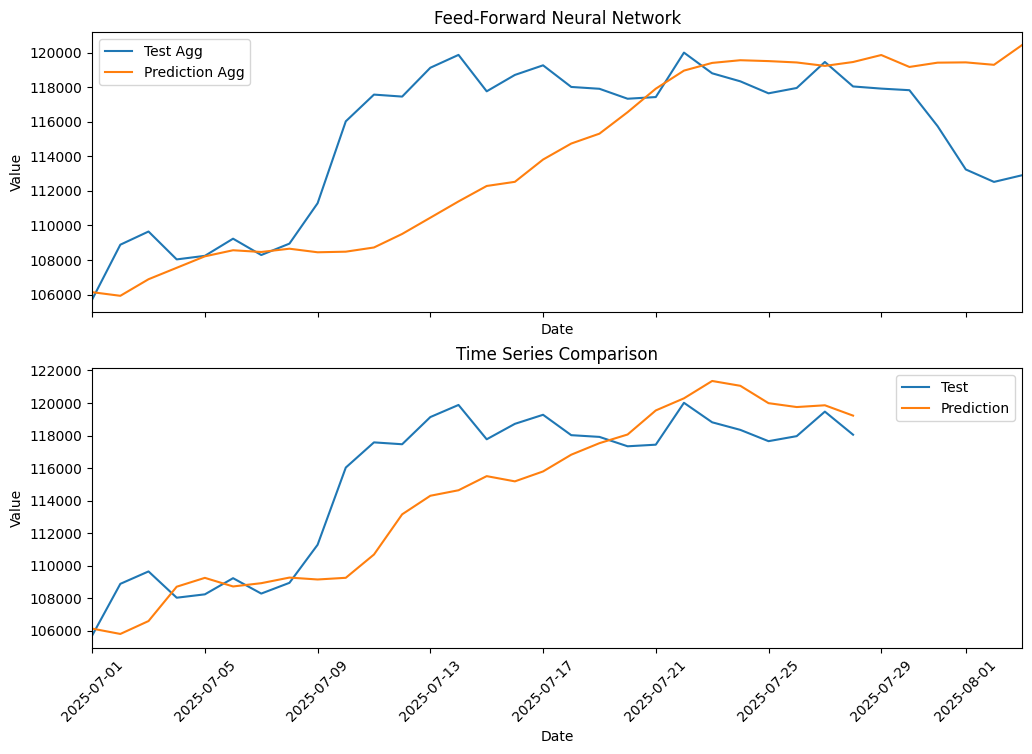

In [ ]:
model9_pred = model9.predict(model9_X_test)
model9_pred_agg = aggregate_forecasts_by_actual_date(
    forecast_df= pd.DataFrame(model9_pred, index= TEST_INDEX),
    start_dates= None,
    weights= None)

model9_test_agg = aggregate_forecasts_by_actual_date(
    forecast_df= pd.DataFrame(model9_y_test, index= TEST_INDEX),
    start_dates= None,
    weights= None)
fig, axes = plt.subplots(2,1,figsize= (12,8), sharex= True)
plot_multiple_series(
    series_dict= {
        'Test Agg': model9_test_agg,
        'Prediction Agg': model9_pred_agg
    },
    title= 'Feed-Forward Neural Network',
    ax= axes[0]
)
plot_multiple_series(
    series_dict= {
        'Test': pd.DataFrame(model9_y_test[:,0], index= TEST_INDEX),
        'Prediction': pd.DataFrame(model9_pred[:,0], index= TEST_INDEX)
    },
    ax= axes[1]
)

### Predicte Unknown Future

In [ ]:
model9_forecast

NameError: name 'model9_forecast' is not defined

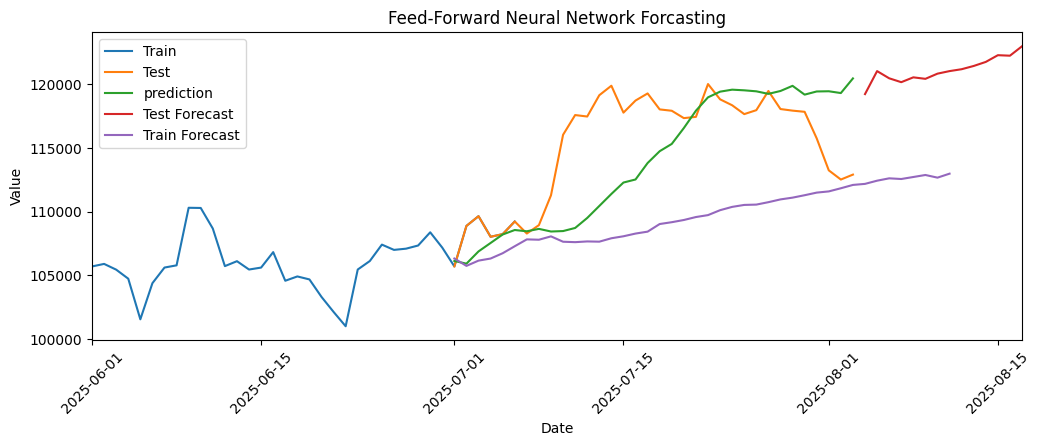

In [ ]:
forecast_horizon = 8
model9_forecast = forecast_future(model= model9,
                                  series=model9_X_test,
                                  forecast_horizon= forecast_horizon,
                                  last_date= TEST_INDEX[-1]+ pd.Timedelta(days= HORIZEN -1),
                                  freq='D')
model9_train_forecast = forecast_future(model= model9,
                                        series=model9_X_train,
                                        forecast_horizon= len(TEST_INDEX) + forecast_horizon -1,
                                        last_date= TRAIN_INDEX[-1],
                                        freq='D')
model9_train_agg = aggregate_forecasts_by_actual_date(
    forecast_df= pd.DataFrame(model9_y_train[-30:], index= TRAIN_INDEX[-30:]),
    start_dates= None,
    weights= None)

model9_forecast_agg = aggregate_forecasts_by_actual_date(
    forecast_df= model9_forecast,
    start_dates= None,
    weights= None)

model9_train_forecast_agg = aggregate_forecasts_by_actual_date(
    forecast_df= model9_train_forecast,
    start_dates= None,
    weights= None)

plot_multiple_series(
    series_dict= {
        'Train': model9_train_agg,
        'Test': model9_test_agg,
        'prediction': model9_pred_agg,
        'Test Forecast': model9_forecast_agg,
        'Train Forecast': model9_train_forecast_agg
    },
    title= 'Feed-Forward Neural Network Forcasting'
);

In [ ]:
print(model9_forecast)

## Model Evaluation

In [ ]:
model9_eval = evaluate_forecasts(model9_y_test, model9_pred, model9_X_train)
model9_eval

{'rmse': 4646.66,
 'mae': 3401.04,
 'r2': -0.42,
 'mase': 0.44,
 'mean_test': 116052.5390625,
 'mean_pred': 114091.0703125,
 'median_test': 117769.0,
 'median_pred': 114802.7578125,
 'std_test': 3896.840087890625,
 'std_pred': 5002.419921875}

# Model 10: CNN1D with `window_size = 30` and `horizen = 1`

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
    )

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]

# Sanity check
assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

# Now pick a split point — e.g., by date
split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
TEST_INDEX = aligned_index[split_index:]

model10_X_train, model10_X_test = ds_X[:split_index], ds_X[split_index:]
model10_y_train, model10_y_test = ds_y[:split_index], ds_y[split_index:]

BATCH_SIZE = 64
model10_train_dataset = tf.data.Dataset.from_tensor_slices((model10_X_train, model10_y_train))
model10_train_dataset = model10_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model10_val_dataset = tf.data.Dataset.from_tensor_slices((model10_X_test, model10_y_test))
model10_val_dataset = model10_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
model10_name = 'model10_Conv1D'

input = tf.keras.layers.Input(shape= (WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Lambda(lambda w: tf.expand_dims(w, axis=1))(input)
x = tf.keras.layers.Conv1D(filters= 256,kernel_size= 5, padding='causal', activation= 'relu')(x)
x = tf.keras.layers.Dense(256, activation= 'relu')(x)
x = tf.keras.layers.Dense(HORIZEN, activation= 'linear')(x)
output = tf.keras.layers.Reshape((HORIZEN,))(x)

model10 = tf.keras.Model(inputs= input, outputs= output, name= model10_name)
model10.compile(optimizer= tf.keras.optimizers.Adam(),
                loss= tf.keras.losses.MeanAbsoluteError(),
                metrics= [tf.keras.metrics.RootMeanSquaredError()])

model10.summary()

Model: "model10_Conv1D"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 1, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 1, 256)         │        38,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1, 256)         │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1, 1)           │           257 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,705 (409.00 KB)

 Trainable params: 104,705 (409.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model10_name)
callbacks.early_stopping(patience=20)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model10_name)

model10_callbacks = callbacks.get_callbacks()

[TensorBoard] Log files will be saved to: TensorBoard/model10_Conv1D/20250803-135145
[EarlyStopping] Will stop if no improvement in 'val_loss' for 20 epochs.
[Checkpoint] Saving only weights to: Models/model10_Conv1D/20250803-135145.weights.h5 (monitoring 'val_loss')


In [ ]:
model10_history = model10.fit(
    model10_train_dataset.repeat(),
    epochs= 200,
    steps_per_epoch= int(len(model10_X_train)/BATCH_SIZE),
    validation_data= model10_val_dataset,
    validation_steps= int(len(model10_X_test)/BATCH_SIZE),
    callbacks= model10_callbacks
)

In [ ]:
model10 = select_best_model(model10, weights_path= os.path.join(DIR_NAME_CHECKPOINT, model10_name), verbose= True)

## Model Prediction

In [ ]:
model10_pred = model10.predict(model10_X_test)

plot_multiple_series(
    series_dict= {
        'Test': pd.DataFrame(model10_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model10_pred, index= TEST_INDEX)
    },
    title= 'Feed-Forward Neural Network'
)

### Predict Unknown Future

In [ ]:
forecast_horizon = 7
model10_forecast = forecast_future(model= model10,
                                  series=model10_X_test,
                                  forecast_horizon= forecast_horizon,
                                  last_date= TEST_INDEX[-2],
                                  freq='D')
model10_train_forecast = forecast_future(model= model10,
                                        series=model10_X_train,
                                        forecast_horizon= len(TEST_INDEX) + forecast_horizon,
                                        last_date= TRAIN_INDEX[-2],
                                        freq='D')
plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model10_y_train[-30:], index= TRAIN_INDEX[-30:]),
        'Val': pd.DataFrame(model10_y_test, index= TEST_INDEX),
        'prediction': pd.DataFrame(model10_pred, index= TEST_INDEX),
        'Test Forecast': model10_forecast,
        'Train Forecast': model10_train_forecast
    },
    title= 'Convolutional Neural Network Forcasting'
);

## Model Evaluation

In [ ]:
model10_eval = evaluate_forecasts(model10_y_test, model10_pred, model10_X_train)
model10_eval

# Model 11: LSTM Layer with `window_size = 30` and `horizen = 1`

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
    )

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]

# Sanity check
assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

# Now pick a split point — e.g., by date
split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
TEST_INDEX = aligned_index[split_index:]

model11_X_train, model11_X_test = ds_X[:split_index], ds_X[split_index:]
model11_y_train, model11_y_test = ds_y[:split_index], ds_y[split_index:]

BATCH_SIZE = 64
model11_train_dataset = tf.data.Dataset.from_tensor_slices((model11_X_train, model11_y_train))
model11_train_dataset = model11_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model11_val_dataset = tf.data.Dataset.from_tensor_slices((model11_X_test, model11_y_test))
model11_val_dataset = model11_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
model11_name = 'Model11_LSTM'

input = tf.keras.layers.Input(shape= (WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Lambda(lambda w: tf.expand_dims(w, axis=1))(input)
x = tf.keras.layers.LSTM(128, activation= 'relu', return_sequences= True)(x)
x = tf.keras.layers.LSTM(128, activation= 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
output = tf.keras.layers.Dense(HORIZEN, activation= 'linear')(x)

model11 = tf.keras.Model(inputs= input, outputs= output, name = model11_name)

model11.compile(loss= tf.keras.losses.MeanAbsoluteError(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001),
                metrics= [tf.keras.metrics.RootMeanSquaredError()])

model11.summary()

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model11_name)
callbacks.early_stopping(patience=30)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model11_name)

model11_callbacks = callbacks.get_callbacks()

In [ ]:
model11_history = model11.fit(
    model11_train_dataset.repeat(),
    epochs= 200,
    steps_per_epoch= int(len(model11_X_train)/BATCH_SIZE),
    validation_data= model11_val_dataset,
    validation_steps= int(len(model11_X_test)/BATCH_SIZE),
    callbacks= model11_callbacks
)

Epoch 1/200
74/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3352.4158 - root_mean_squared_error: 5973.5469
Epoch 1: val_loss improved from inf to 85607.82031, saving model to Models/Model11_LSTM/20250803-135235.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 3791.1008 - root_mean_squared_error: 6683.2437 - val_loss: 85607.8203 - val_root_mean_squared_error: 85724.8594
Epoch 2/200
70/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 5462.7495 - root_mean_squared_error: 14639.6504
Epoch 2: val_loss improved from 85607.82031 to 29761.77930, saving model to Models/Model11_LSTM/20250803-135235.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 5682.8301 - root_mean_squared_error: 14554.9688 - val_loss: 29761.7793 - val_root_mean_squared_error: 30073.1094
Epoch 3/200
67/76 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2910.7158 - root_mean_squared_error: 6967.9248
Epoch 3: val_loss improved from 29761.77930 to 4057.42822, saving model to Models/Model11_LSTM/20250803-135235.weights.h5
7

In [ ]:
model11 = select_best_model(model11, weights_path= os.path.join(DIR_NAME_CHECKPOINT, model11_name), verbose= True)

✅ Loaded weights from: Models/Model11_LSTM/20250803-135235.weights.h5


## Model Prediction

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 227ms/step


<Axes: title={'center': 'LSTM'}, xlabel='Date', ylabel='Value'>

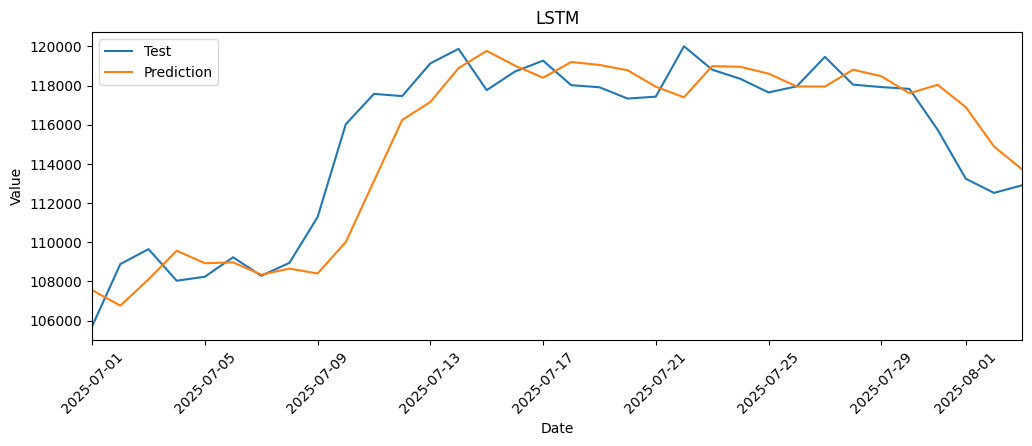

In [ ]:
model11_pred = model11.predict(model11_X_test)

plot_multiple_series(
    series_dict= {
        'Test': pd.DataFrame(model11_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model11_pred, index= TEST_INDEX)
    },
    title= 'LSTM'
)

### Predict Unknown Future

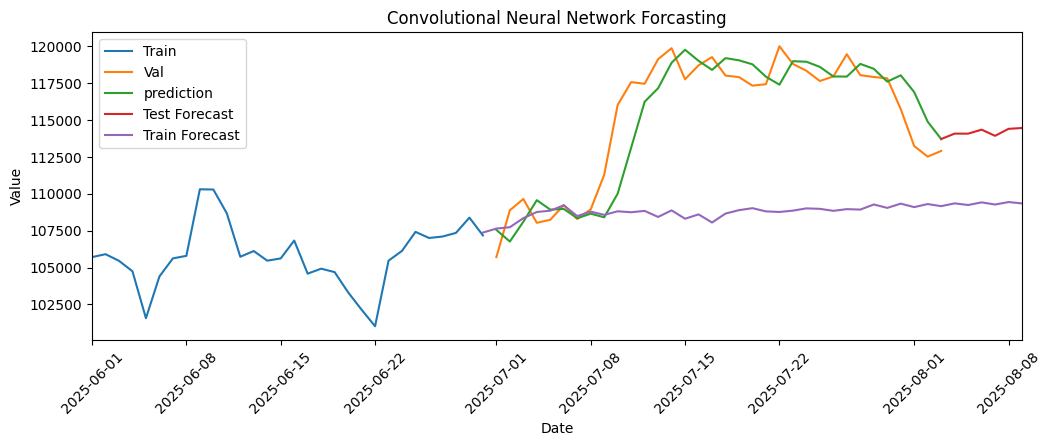

In [ ]:
forecast_horizon = 7
model11_forecast = forecast_future(model= model11,
                                  series=model11_X_test,
                                  forecast_horizon= forecast_horizon,
                                  last_date= TEST_INDEX[-2],
                                  freq='D')
model11_train_forecast = forecast_future(model= model11,
                                        series=model11_X_train,
                                        forecast_horizon= len(TEST_INDEX) + forecast_horizon,
                                        last_date= TRAIN_INDEX[-2],
                                        freq='D')
plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model11_y_train[-30:], index= TRAIN_INDEX[-30:]),
        'Val': pd.DataFrame(model11_y_test, index= TEST_INDEX),
        'prediction': pd.DataFrame(model11_pred, index= TEST_INDEX),
        'Test Forecast': model11_forecast,
        'Train Forecast': model11_train_forecast
    },
    title= 'Convolutional Neural Network Forcasting'
);

## Model Evaluation

In [ ]:
model11_eval = evaluate_forecasts(model11_y_test, model11_pred, model11_X_train)
model11_eval

{'rmse': 1956.39,
 'mae': 1467.01,
 'r2': 0.79,
 'mase': 0.21,
 'mean_test': 115156.5625,
 'mean_pred': 115037.53125,
 'median_test': 117521.5,
 'median_pred': 117506.34375,
 'std_test': 4286.47021484375,
 'std_pred': 4455.7099609375}

# Model 12: GRU Layer with `window_size = 30` and `horizen = 1`

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
)

# Align df_daily index to supervised samples
aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]

# Sanity check
assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)
end_date = '2025-07-25'
end_index = aligned_index.get_loc(end_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
VAL_INDEX = aligned_index[split_index:end_index]
TEST_INDEX = aligned_index[end_index:]

model12_X_train, model12_X_val, model12_X_test = ds_X[:split_index], ds_X[split_index:end_index], ds_X[end_index:]
model12_y_train, model12_y_val, model12_y_test = ds_y[:split_index], ds_y[split_index:end_index], ds_y[end_index:]

BATCH_SIZE = 64
model12_train_dataset = tf.data.Dataset.from_tensor_slices((model12_X_train, model12_y_train))
model12_train_dataset = model12_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model12_val_dataset = tf.data.Dataset.from_tensor_slices((model12_X_val, model12_y_val))
model12_val_dataset = model12_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

In [ ]:
TEST_INDEX

DatetimeIndex(['2025-07-25', '2025-07-26', '2025-07-27', '2025-07-28',
               '2025-07-29', '2025-07-30', '2025-07-31', '2025-08-01',
               '2025-08-02', '2025-08-03'],
              dtype='datetime64[ns]', name='Timestamp', freq='D')

## Building Up The Model

In [ ]:
model12_name = 'Model12_GRU'

input = tf.keras.layers.Input(shape= (WINDOW_SIZE,), dtype= tf.float32)
x = tf.keras.layers.Lambda(lambda w: tf.expand_dims(w, axis=1))(input)
x = tf.keras.layers.GRU(128, activation= 'relu', return_sequences= True)(x)
x = tf.keras.layers.GRU(128, activation= 'relu')(x)
x = tf.keras.layers.Dense(128, activation = 'relu')(x)
output = tf.keras.layers.Dense(HORIZEN, activation= 'linear')(x)

model12 = tf.keras.Model(inputs= input, outputs= output, name = model12_name)

model12.compile(loss= tf.keras.losses.MeanAbsoluteError(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.00001),
                metrics= [tf.keras.metrics.RootMeanSquaredError()])

model12.summary()

Model: "Model12_GRU"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 30)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda_2 (Lambda)               │ (None, 1, 30)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 1, 128)         │        61,440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 128)            │        99,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 177,153 (692.00 KB)

 Trainable params: 177,153 (692.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model12_name)
callbacks.early_stopping(patience=30)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model12_name)

model12_callbacks = callbacks.get_callbacks()

[TensorBoard] Log files will be saved to: TensorBoard/Model12_GRU/20250803-135451
[EarlyStopping] Will stop if no improvement in 'val_loss' for 30 epochs.
[Checkpoint] Saving only weights to: Models/Model12_GRU/20250803-135451.weights.h5 (monitoring 'val_loss')


In [ ]:
model12.fit(
    model12_train_dataset.repeat(),
    epochs= 200,
    steps_per_epoch= int(len(model12_X_train)/BATCH_SIZE),
    validation_data= model12_val_dataset,
    validation_steps= int(len(model12_X_val)/BATCH_SIZE),
    callbacks= model12_callbacks
)

Epoch 1/200
75/76 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3816.0872 - root_mean_squared_error: 6823.0664
Epoch 1: val_loss improved from inf to 107150.94531, saving model to Models/Model12_GRU/20250803-135451.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 4161.5122 - root_mean_squared_error: 7398.7065 - val_loss: 107150.9453 - val_root_mean_squared_error: 107251.4219
Epoch 2/200
72/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 7546.4355 - root_mean_squared_error: 19345.0039
Epoch 2: val_loss improved from 107150.94531 to 103604.18750, saving model to Models/Model12_GRU/20250803-135451.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 8029.8408 - root_mean_squared_error: 19749.8320 - val_loss: 103604.1875 - val_root_mean_squared_error: 103711.3125
Epoch 3/200
74/76 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 11814.6299 - root_mean_squared_error: 25745.1328
Epoch 3: val_loss improved from 103604.18750 to 100005.52344, saving model to Models/Model12_GRU/20250803-135451.we

In [ ]:
model12 = select_best_model(
    model= model12,
    weights_path= os.path.join(DIR_NAME_CHECKPOINT, model12_name),
    verbose= True
)

✅ Loaded weights from: Models/Model12_GRU/20250803-135451.weights.h5


## Model Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step


<Axes: title={'center': 'GRU'}, xlabel='Date', ylabel='Value'>

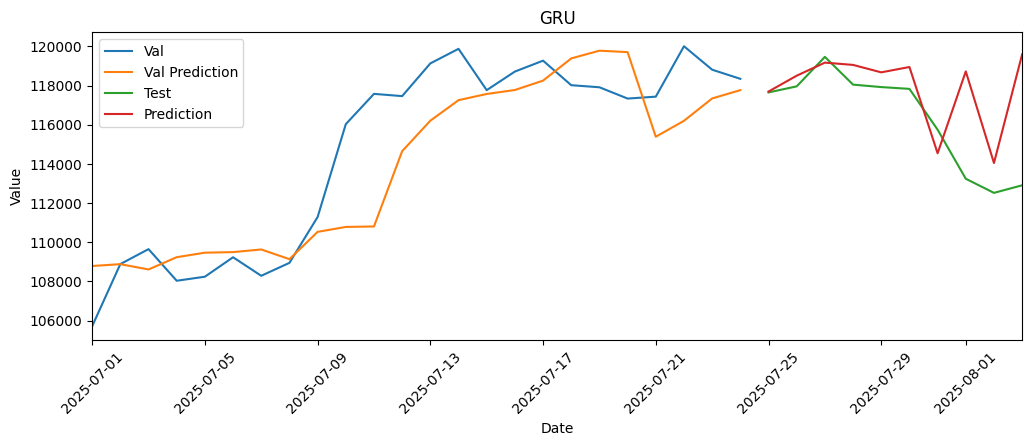

In [ ]:
model12_pred_val = model12.predict(model12_X_val)
model12_pred = model12.predict(model12_X_test)

plot_multiple_series(
    series_dict= {
        'Val': pd.DataFrame(model12_y_val, index= VAL_INDEX),
        'Val Prediction': pd.DataFrame(model12_pred_val, index= VAL_INDEX),
        'Test': pd.DataFrame(model12_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model12_pred, index= TEST_INDEX)
    },
    title= 'GRU'
)

<Axes: title={'center': 'GRU Forecast'}, xlabel='Date', ylabel='Value'>

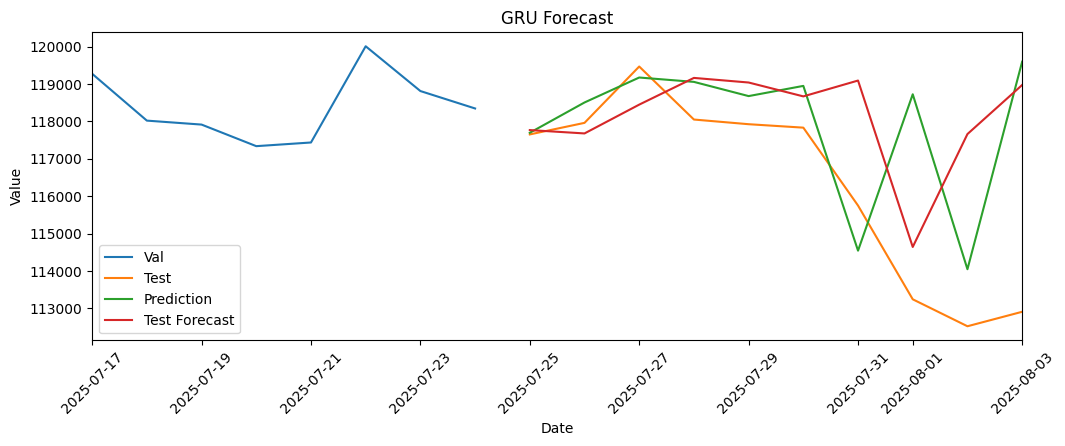

In [ ]:
model12_test_forecast = forecast_future(model= model12,
                                        series=model12_X_val,
                                        forecast_horizon= len(TEST_INDEX),
                                        last_date= VAL_INDEX[-1],
                                        freq='D')
plot_multiple_series(
    series_dict={
        'Val': pd.DataFrame(model12_y_val, index= VAL_INDEX).loc['2025-07-17':],
        #'Val Prediction': pd.DataFrame(model12_pred_val, index= VAL_INDEX).loc['2025-07-17':],
        'Test': pd.DataFrame(model12_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model12_pred, index= TEST_INDEX),
        'Test Forecast': model12_test_forecast
    },
    title= 'GRU Forecast'
)

### Predict Unknown Future

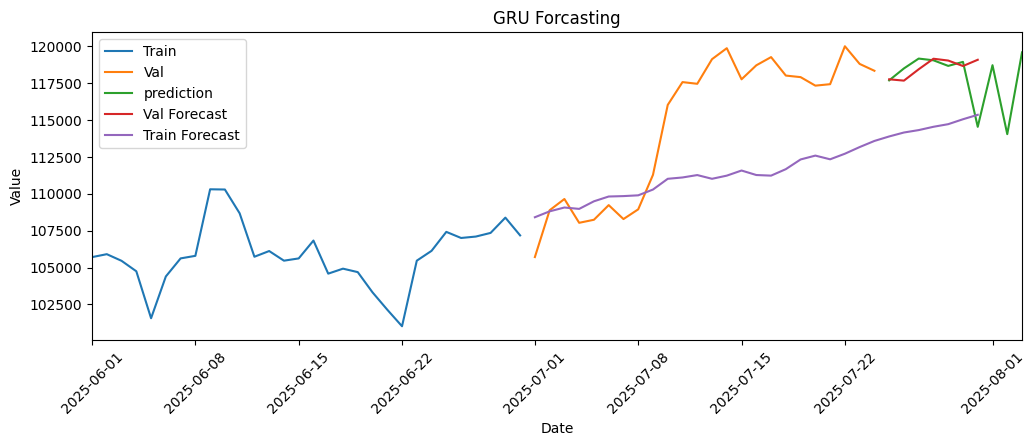

In [ ]:
forecast_horizon = 7
model12_forecast = forecast_future(model= model12,
                                  series=model12_X_val,
                                  forecast_horizon= forecast_horizon,
                                  last_date= VAL_INDEX[-1],
                                  freq='D')
model12_train_forecast = forecast_future(model= model12,
                                        series=model12_X_train,
                                        forecast_horizon= len(VAL_INDEX) + forecast_horizon,
                                        last_date= TRAIN_INDEX[-1],
                                        freq='D')
plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model12_y_train[-30:], index= TRAIN_INDEX[-30:]),
        'Val': pd.DataFrame(model12_y_val, index= VAL_INDEX),
        'prediction': pd.DataFrame(model12_pred, index= TEST_INDEX),
        'Val Forecast': model12_forecast,
        'Train Forecast': model12_train_forecast
    },
    title= 'GRU Forcasting'
);

## Model Evaluation

In [ ]:
model12_eval = evaluate_forecasts(model12_y_val, model12_pred_val, model12_X_train)
model12_eval

{'rmse': 2473.95,
 'mae': 1881.33,
 'r2': 0.73,
 'mase': 0.29,
 'mean_test': 114666.84375,
 'mean_pred': 113861.5,
 'median_test': 117450.5,
 'median_pred': 115020.546875,
 'std_test': 4774.2001953125,
 'std_pred': 4129.2001953125}

# Model 13: Multivariate Model Using *Bitcoin Halving* Data As `Exogenous Variable` with `winsow_size = 30` and `horizen = 1`

## Data Preparation

### Adding Second Column

In [ ]:
df_daily.head()

Open  High   Low  Close      Volume
Timestamp                                      
2012-01-01  4.58  4.84  4.58   4.84   10.000000
2012-01-02  4.84  5.00  4.84   5.00   10.100000
2012-01-03  5.00  5.32  5.00   5.29  107.085281
2012-01-04  5.29  5.57  4.93   5.57  107.233260
2012-01-05  5.57  6.46  5.57   6.42   70.328742

In [ ]:
ex_df = pd.DataFrame(
    [100, 50, 25, 12.5, 6.25],
    index=pd.to_datetime([
        '2012-01-01',  # df_daily.index[0]
        '2012-11-28',
        '2016-09-07',
        '2020-05-11',
        '2024-04-20'
    ]),
    columns=['halving']
)
ex_df

halving
2012-01-01   100.00
2012-11-28    50.00
2016-09-07    25.00
2020-05-11    12.50
2024-04-20     6.25

In [ ]:
multivariate_df = df_daily[['Close']].join(ex_df).ffill()
multivariate_df.tail()

Close  halving
Timestamp                    
2025-07-30  117834.0     6.25
2025-07-31  115750.0     6.25
2025-08-01  113243.0     6.25
2025-08-02  112522.0     6.25
2025-08-03  112909.0     6.25

<Axes: xlabel='Timestamp'>

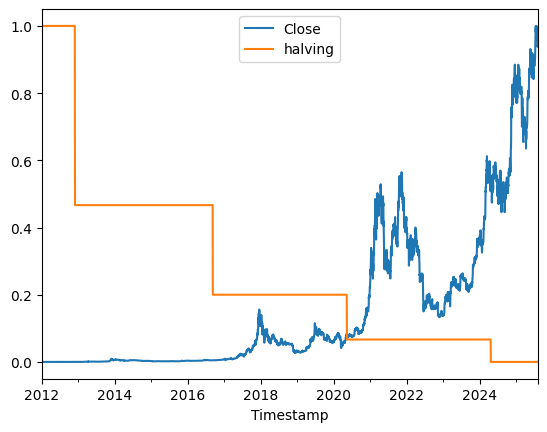

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler_half = MinMaxScaler()

scaled_multivariate_df = multivariate_df.copy()
scaled_multivariate_df['Close'] = scaler.fit_transform(multivariate_df[['Close']])
scaled_multivariate_df['halving'] = scaler_half.fit_transform(multivariate_df[['halving']])

scaled_multivariate_df.plot()

### Making Datasets

In [ ]:
ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(scaled_multivariate_df.to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
)
ds_y = tf.squeeze(ds_y[:,:,0])
print(f'Input data shape: {ds_X.shape}')
print(f'Output data shape: {ds_y.shape}')

aligned_index = scaled_multivariate_df.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else scaled_multivariate_df.index[WINDOW_SIZE:]

assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)
end_date = '2025-07-25'
end_index = aligned_index.get_loc(end_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
VAL_INDEX = aligned_index[split_index:end_index]
TEST_INDEX = aligned_index[end_index:]

model13_X_train, model13_X_val, model13_X_test = ds_X[:split_index], ds_X[split_index:end_index], ds_X[end_index:]
model13_y_train, model13_y_val, model13_y_test = ds_y[:split_index], ds_y[split_index:end_index], ds_y[end_index:]

BATCH_SIZE = 64
model13_train_dataset = tf.data.Dataset.from_tensor_slices((model13_X_train, model13_y_train))
model13_train_dataset = model13_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model13_val_dataset = tf.data.Dataset.from_tensor_slices((model13_X_val, model13_y_val))
model13_val_dataset = model13_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

Input data shape: (4934, 30, 2)
Output data shape: (4934,)


## Building Up The Model

In [ ]:
model13_name = 'Model13_Multivariate'

input = tf.keras.layers.Input(shape= (WINDOW_SIZE, 2), dtype= tf.float32)
x = tf.keras.layers.Dense(128, activation= 'relu')(input)
x = tf.keras.layers.LSTM(128, activation= 'relu', return_sequences= True)(x)
x = tf.keras.layers.Dense(128, activation= 'relu')(x)
x = tf.keras.layers.GlobalMaxPooling1D()(x)
output = tf.keras.layers.Dense(HORIZEN, activation= 'linear')(x)

model13 = tf.keras.Model(inputs= input, outputs= output, name = model13_name)

model13.compile(loss= tf.keras.losses.MeanAbsoluteError(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.0001),
                metrics= [tf.keras.metrics.RootMeanSquaredError()])

model13.summary()

Model: "Model13_Multivariate"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 30, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 30, 128)        │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 128)        │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 30, 128)        │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 148,609 (580.50 KB)

 Trainable params: 148,609 (580.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model13_name)
callbacks.early_stopping(patience=30)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model13_name)

model13_callbacks = callbacks.get_callbacks()

[TensorBoard] Log files will be saved to: TensorBoard/Model13_Multivariate/20250803-135545
[EarlyStopping] Will stop if no improvement in 'val_loss' for 30 epochs.
[Checkpoint] Saving only weights to: Models/Model13_Multivariate/20250803-135545.weights.h5 (monitoring 'val_loss')


In [ ]:
model13.fit(
    model13_train_dataset,
    epochs = 100,
    steps_per_epoch = int(len(model13_X_train)/BATCH_SIZE),
    validation_data = model13_val_dataset,
    validation_steps = int(len(model13_X_val)/BATCH_SIZE),
    callbacks = model13_callbacks
)

Epoch 1/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0299 - root_mean_squared_error: 0.0536
Epoch 1: val_loss improved from inf to 0.63772, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0309 - root_mean_squared_error: 0.0554 - val_loss: 0.6377 - val_root_mean_squared_error: 0.6385
Epoch 2/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - loss: 0.5781 - root_mean_squared_error: 0.5784
Epoch 2: val_loss improved from 0.63772 to 0.61958, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5781 - root_mean_squared_error: 0.5784 - val_loss: 0.6196 - val_root_mean_squared_error: 0.6203
Epoch 3/100


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0986 - root_mean_squared_error: 0.1163
Epoch 3: val_loss improved from 0.61958 to 0.06551, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 9s 59ms/step - loss: 0.0983 - root_mean_squared_error: 0.1161 - val_loss: 0.0655 - val_root_mean_squared_error: 0.0694
Epoch 4/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - loss: 0.0876 - root_mean_squared_error: 0.0896
Epoch 4: val_loss did not improve from 0.06551
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step - loss: 0.0876 - root_mean_squared_error: 0.0896 - val_loss: 0.0957 - val_root_mean_squared_error: 0.0985
Epoch 5/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0538 - root_mean_squared_error: 0.0662
Epoch 5: val_loss improved from 0.06551 to 0.04236, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - loss: 0.0536 - root_mean_squared_error: 0.0660 - val_loss: 0.0424 - val_root_mean

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 0.0063 - root_mean_squared_error: 0.0100
Epoch 61: val_loss improved from 0.01603 to 0.01594, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - loss: 0.0064 - root_mean_squared_error: 0.0102 - val_loss: 0.0159 - val_root_mean_squared_error: 0.0203
Epoch 62/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 3s 48ms/step - loss: 0.0238 - root_mean_squared_error: 0.0283
Epoch 62: val_loss did not improve from 0.01594
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step - loss: 0.0238 - root_mean_squared_error: 0.0283 - val_loss: 0.0165 - val_root_mean_squared_error: 0.0200
Epoch 63/100
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - loss: 0.0085 - root_mean_squared_error: 0.0122
Epoch 63: val_loss did not improve from 0.01594
76/76 ━━━━━━━━━━━━━━━━━━━━ 5s 68ms/step - loss: 0.0086 - root_mean_squared_error: 0.0123 - val_loss: 0.0160 - val_root_mean_squared_error: 0.0206
Epoch 64/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - loss: 0.0043 - root_mean_squared_error: 0.0080
Epoch 99: val_loss did not improve from 0.01490
76/76 ━━━━━━━━━━━━━━━━━━━━ 10s 59ms/step - loss: 0.0044 - root_mean_squared_error: 0.0081 - val_loss: 0.0149 - val_root_mean_squared_error: 0.0206
Epoch 100/100
 1/76 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - loss: 0.0186 - root_mean_squared_error: 0.0229
Epoch 100: val_loss improved from 0.01490 to 0.01486, saving model to Models/Model13_Multivariate/20250803-135545.weights.h5
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 792us/step - loss: 0.0186 - root_mean_squared_error: 0.0229 - val_loss: 0.0149 - val_root_mean_squared_error: 0.0193
Restoring model weights from the end of the best epoch: 100.


In [ ]:
model13 = select_best_model(
    model= model13,
    weights_path= os.path.join(DIR_NAME_CHECKPOINT, model13_name),
    verbose= True
)

✅ Loaded weights from: Models/Model13_Multivariate/20250803-135545.weights.h5


## Model Prediction

<Axes: title={'center': 'Multivariate Model'}, xlabel='Date', ylabel='Value'>

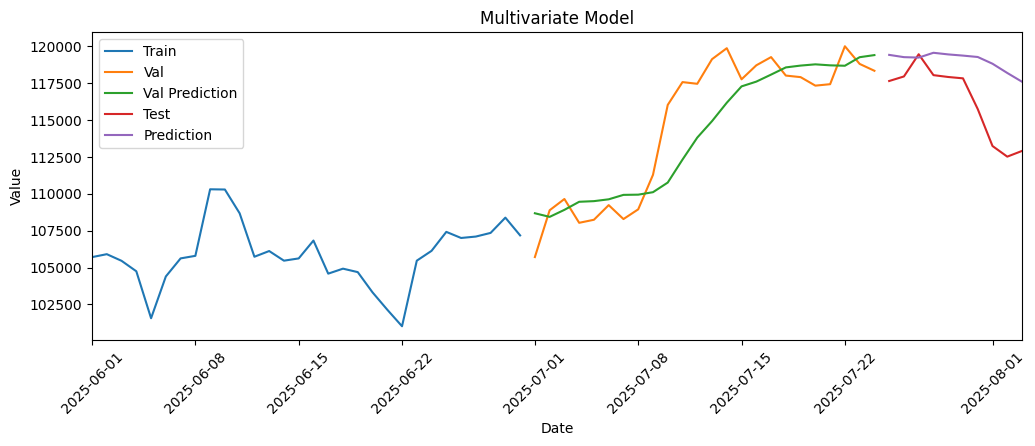

In [ ]:
model13_val_pred = model13.predict(model13_X_val, verbose=False)
model13_pred = model13.predict(model13_X_test, verbose= False)

model13_val_pred = scaler.inverse_transform(model13_val_pred)
model13_pred = scaler.inverse_transform(model13_pred)

model13_y_train = scaler.inverse_transform(tf.expand_dims(model13_y_train, axis= 1))
model13_y_val = scaler.inverse_transform(tf.expand_dims(model13_y_val, axis= 1))
model13_y_test = scaler.inverse_transform(tf.expand_dims(model13_y_test, axis= 1))

plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model13_y_train, index= TRAIN_INDEX).loc['2025-06-01':],
        'Val': pd.DataFrame(model13_y_val, index= VAL_INDEX),
        'Val Prediction': pd.DataFrame(model13_val_pred, index= VAL_INDEX),
        'Test': pd.DataFrame(model13_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model13_pred, index= TEST_INDEX)
    },
    title= 'Multivariate Model'
)

## Model Evaluation

In [ ]:
model13_eval = evaluate_forecasts(model13_y_val, model13_val_pred, model13_X_train[:,:,0])
model13_eval

{'rmse': 2319.18,
 'mae': 1783.68,
 'r2': 0.76,
 'mase': 0.02,
 'mean_test': 114666.83,
 'mean_pred': 114072.65625,
 'median_test': 117450.5,
 'median_pred': 114373.1171875,
 'std_test': 4774.2,
 'std_pred': 4182.52001953125}

# Model 14: N-Beat Algorithm

> from https://arxiv.org/abs/1905.10437

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
)

aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]

assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)
end_date = '2025-07-25'
end_index = aligned_index.get_loc(end_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
VAL_INDEX = aligned_index[split_index:end_index]
TEST_INDEX = aligned_index[end_index:]

BATCH_SIZE = 1024
model14_X_train, model14_y_train = ds_X[:split_index], ds_y[:split_index]
model14_X_val, model14_y_val = ds_X[split_index:end_index], ds_y[split_index:end_index]
model14_X_test, model14_y_test = ds_X[end_index:], ds_y[end_index:]

model14_train_dataset = tf.data.Dataset.from_tensor_slices((model14_X_train, model14_y_train))
model14_train_dataset = model14_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model14_val_dataset = tf.data.Dataset.from_tensor_slices((model14_X_val, model14_y_val))
model14_val_dataset = model14_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
class NBeatBlock(tf.keras.layers.Layer):
    def __init__(self,
                 input_size,
                 horizen,
                 num_layers,
                 units,
                 output_size,
                 activation = 'relu',
                 **kwargs):
        super().__init__(**kwargs)
        self.input_size = input_size
        self.horizen = horizen
        self.num_layers = num_layers
        self.units = units
        self.output_size = output_size
        self.activation = activation

        self.layers = [tf.keras.layers.Dense(units, activation= activation) for _ in range(num_layers)]
        self.output_layers = tf.keras.layers.Dense(output_size, activation= 'linear', name= 'theta_layer')

    def call(self, inputs):
        x = inputs
        for layer in self.layers:
            x = layer(x)
        output = self.output_layers(x)
        backcast, forecast = output[:,:self.input_size], output[:, -self.horizen:]

        return backcast, forecast


In [ ]:
class NBeatStack(tf.keras.layers.Layer):
    def __init__(self,
                 input_size,
                 horizen,
                 num_blocks,
                 num_layers,
                 units,
                 output_size,
                 activation = 'relu',
                 **kwargs):
        super().__init__(**kwargs)

        self.input_size = input_size
        self.horizen = horizen
        self.num_blocks = num_blocks
        self.num_layers = num_layers
        self.units = units
        self.output_size = output_size
        self.activation = activation

        self.blocks = [NBeatBlock(
            input_size= self.input_size,
            horizen= self.horizen,
            num_layers= self.num_layers,
            units= self.units,
            output_size= self.output_size,
            activation= self.activation
        ) for _ in range(num_blocks)]

    def call(self, inputs):
        batch_size = tf.shape(inputs)[0]
        stack_forecast = tf.zeros((batch_size, self.horizen), dtype=inputs.dtype)
        stack_backcast = inputs

        for block in self.blocks:
            block_backcast, blockforecast = block(stack_backcast)
            stack_backcast = tf.keras.layers.subtract([stack_backcast, block_backcast])
            stack_forecast = tf.keras.layers.add([stack_forecast, blockforecast])
        return stack_backcast, stack_forecast


In [ ]:
# Defining hyper-parameters
# WINDOW_SIZE = 30 # Defined in `Data Preparation` section
# HORIZEN = 1 # Defined in `Data Preparation` section

NUM_BLOCKS = 1
NUM_BLOCK_LAYERS = 4
NUM_BLOCK_NEURONS = 128
OUTPUT_SIZE = WINDOW_SIZE + HORIZEN
NUM_STACK = 30

In [ ]:
model14_name = 'Model14_NBeat'

input = tf.keras.layers.Input(shape= (WINDOW_SIZE,), dtype= tf.float32, name= 'NBeat_Input')

stack_backcast, stack_forecast = (
    NBeatStack(
        input_size= WINDOW_SIZE,
        horizen= HORIZEN,
        num_blocks= NUM_BLOCKS,
        num_layers= NUM_BLOCK_LAYERS,
        units= NUM_BLOCK_NEURONS,
        output_size= OUTPUT_SIZE,
        name= 'NBeatStack_1'
        )(input)
    )
output = stack_forecast
for i in range(NUM_STACK):
    stack_backcast, stack_forecast = (
        NBeatStack(
            input_size= WINDOW_SIZE,
            horizen= HORIZEN,
            num_blocks= NUM_BLOCKS,
            num_layers= NUM_BLOCK_LAYERS,
            units= NUM_BLOCK_NEURONS,
            output_size= OUTPUT_SIZE,
            name= f'NBeatStack_{i+2}'
            )(stack_backcast)
    )
    output = tf.keras.layers.add([output, stack_forecast], name= f'NBeat_Output_{i+1}')

model14 = tf.keras.Model(inputs= input, outputs= output, name = model14_name)

model14.compile(loss= tf.keras.losses.MeanAbsoluteError(),
                optimizer= tf.keras.optimizers.Adam(learning_rate= 0.001),
                metrics= [tf.keras.metrics.RootMeanSquaredError()])

model14.summary()

Model: "Model14_NBeat"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ NBeat_Input         │ (None, 30)        │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_1        │ [(None, 30),      │     57,503 │ NBeat_Input[0][0] │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_2        │ [(None, 30),      │     57,503 │ NBeatStack_1[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_1      │ (None, 1)         │          0 │ NBeatStack_1[0][… │
│ (Add)               │                   │            │ NBeatStack_2[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_3        │ [(None, 30),      │     57,503 │ NBeatStack_2[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_2      │ (None, 1)         │          0 │ NBeat_Output_1[0… │
│ (Add)               │                   │            │ NBeatStack_3[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_4        │ [(None, 30),      │     57,503 │ NBeatStack_3[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_3      │ (None, 1)         │          0 │ NBeat_Output_2[0… │
│ (Add)               │                   │            │ NBeatStack_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_5        │ [(None, 30),      │     57,503 │ NBeatStack_4[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_4      │ (None, 1)         │          0 │ NBeat_Output_3[0… │
│ (Add)               │                   │            │ NBeatStack_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_6        │ [(None, 30),      │     57,503 │ NBeatStack_5[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_5      │ (None, 1)         │          0 │ NBeat_Output_4[0… │
│ (Add)               │                   │            │ NBeatStack_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_7        │ [(None, 30),      │     57,503 │ NBeatStack_6[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_6      │ (None, 1)         │          0 │ NBeat_Output_5[0… │
│ (Add)               │                   │            │ NBeatStack_7[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_8        │ [(None, 30),      │     57,503 │ NBeatStack_7[0][… │
│ (NBeatStack)        │ (None, 1)]        │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeat_Output_7      │ (None, 1)         │          0 │ NBeat_Output_6[0… │
│ (Add)               │                   │            │ NBeatStack_8[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ NBeatStack_9        │ [(None, 30),      │     57,503 │ NBeatStack_8[0][

 Total params: 1,782,593 (6.80 MB)

 Trainable params: 1,782,593 (6.80 MB)

 Non-trainable params: 0 (0.00 B)

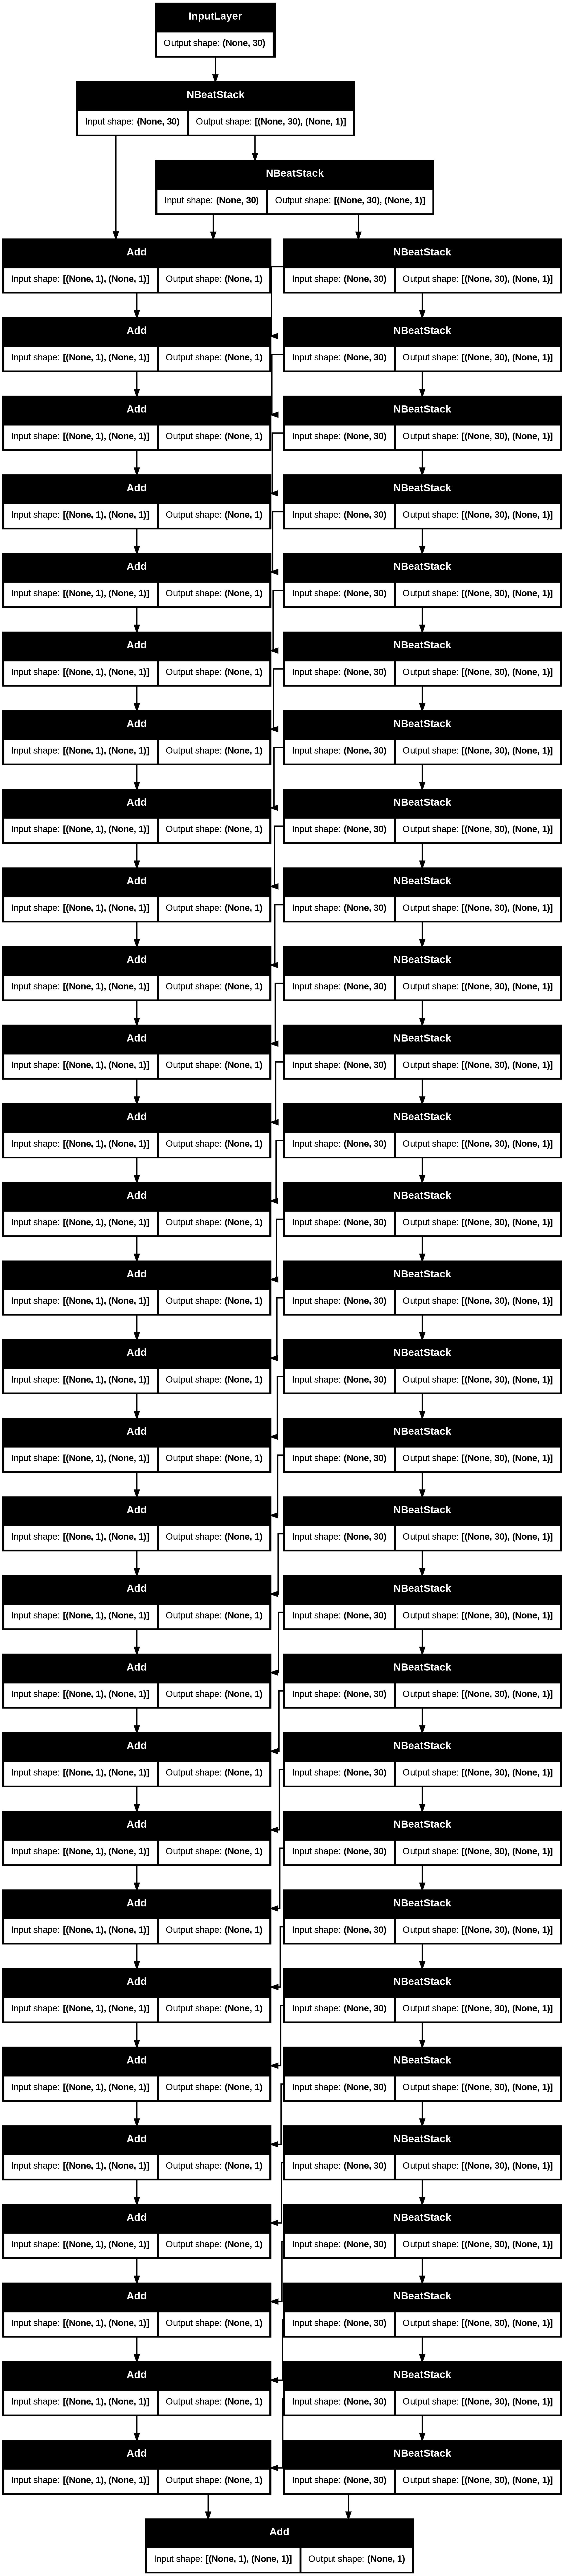

In [ ]:
tf.keras.utils.plot_model(model14, show_shapes=True)

In [ ]:
callbacks = ModelCallbacks(verbose=True)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model14_name)
callbacks.early_stopping(patience=30)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model14_name)
callbacks.reduce_lr(factor=0.1)

model14_callbacks = callbacks.get_callbacks()

[TensorBoard] Log files will be saved to: TensorBoard/Model14_NBeat/20250803-140122
[EarlyStopping] Will stop if no improvement in 'val_loss' for 30 epochs.
[Checkpoint] Saving only weights to: Models/Model14_NBeat/20250803-140122.weights.h5 (monitoring 'val_loss')
[ReduceLROnPlateau] Will reduce learning rate by a factor of 0.1 if 'val_loss' does not improve for 10 epochs (min_lr=0.0).


In [ ]:
model14.fit(
    model14_train_dataset,
    epochs = 100,
    steps_per_epoch = int(len(model14_X_train)/BATCH_SIZE),
    validation_data = model14_val_dataset,
    validation_steps = int(len(model14_X_val)/BATCH_SIZE),
    callbacks = model14_callbacks
)

Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step - loss: 8366.9688 - root_mean_squared_error: 12673.0791
Epoch 1: val_loss improved from inf to 369456.87500, saving model to Models/Model14_NBeat/20250803-140122.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 44s 1s/step - loss: 9960.0938 - root_mean_squared_error: 14691.2881 - val_loss: 369456.8750 - val_root_mean_squared_error: 369660.5938 - learning_rate: 0.0010
Epoch 2/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - loss: 202235.5000 - root_mean_squared_error: 220134.8594
Epoch 2: val_loss improved from 369456.87500 to 98701.40625, saving model to Models/Model14_NBeat/20250803-140122.weights.h5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - loss: 202235.5000 - root_mean_squared_error: 220134.8594 - val_loss: 98701.4062 - val_root_mean_squared_error: 98757.3750 - learning_rate: 0.0010
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 214ms/step - loss: 1655.6307 - root_mean_squared_error: 2766.5635
Epoch 3: val_loss improved from 98701.40625 to 39542.28516, saving model to Models/Model14_NBeat/20250803-140122.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 470ms/step - loss: 1959.4502 - root_mean_squared_error: 3251.5491 - val_loss: 39542.2852 - val_root_mean_squared_error: 39717.2695 - learning_rate: 0.0010
Epoch 4/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - loss: 20297.2402 - root_mean_squared_error: 22603.1406
Epoch 4: val_loss did not improve from 39542.28516
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 20297.2402 - root_mean_squared_error: 22603.1406 - val_loss: 245016.0781 - val_root_mean_squared_error: 245038.5625 - learning_rate: 0.0010
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 311ms/step - los

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step - loss: 24876.1211 - root_mean_squared_error: 43226.1406
Epoch 7: val_loss did not improve from 39542.28516
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 296ms/step - loss: 34214.7617 - root_mean_squared_error: 59552.5430 - val_loss: 264970.3438 - val_root_mean_squared_error: 265087.5000 - learning_rate: 0.0010
Epoch 8/100
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - loss: 153238.1250 - root_mean_squared_error: 168099.4688
Epoch 8: val_loss improved from 39542.28516 to 9865.96484, saving model to Models/Model14_NBeat/20250803-140122.weights.h5
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - loss: 153238.1250 - root_mean_squared_error: 168099.4688 - val_loss: 9865.9648 - val_root_mean_squared_error: 10684.0283 - learning_rate: 0.0010
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - loss: 1562.2800 - root_mean_squared_error: 2670.3181
Epoch 9: val_loss did not improve from 9865.96484
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - loss: 2048.9106 - root_mean_squared_error: 3490.46

In [ ]:
model14 = select_best_model(
    model= model14,
    weights_path= os.path.join(DIR_NAME_CHECKPOINT, model14_name),
    verbose= True
    )

✅ Loaded weights from: Models/Model14_NBeat/20250803-140122.weights.h5


## Model Prediction

In [ ]:
model14_X_val
batch_size = tf.shape(model14_X_val)[0]
stack_forecast = tf.constant(4, shape=(batch_size,1))
tf.keras.layers.add([model14_X_val, stack_forecast])

<tf.Tensor: shape=(24, 30), dtype=float32, numpy=
array([[105709., 105909., 105458., 104749., 101563., 104397., 105623.,
        105796., 110311., 110296., 108682., 105735., 106122., 105468.,
        105621., 106833., 104588., 104926., 104692., 103320., 102143.,
        101019., 105468., 106135., 107422., 107008., 107104., 107352.,
        108388., 107183.],
       [105909., 105458., 104749., 101563., 104397., 105623., 105796.,
        110311., 110296., 108682., 105735., 106122., 105468., 105621.,
        106833., 104588., 104926., 104692., 103320., 102143., 101019.,
        105468., 106135., 107422., 107008., 107104., 107352., 108388.,
        107183., 105713.],
       [105458., 104749., 101563., 104397., 105623., 105796., 110311.,
        110296., 108682., 105735., 106122., 105468., 105621., 106833.,
        104588., 104926., 104692., 103320., 102143., 101019., 105468.,
        106135., 107422., 107008., 107104., 107352., 108388., 107183.,
        105713., 108889.],
       [104749., 

<Axes: title={'center': 'NBeat Model'}, xlabel='Date', ylabel='Value'>

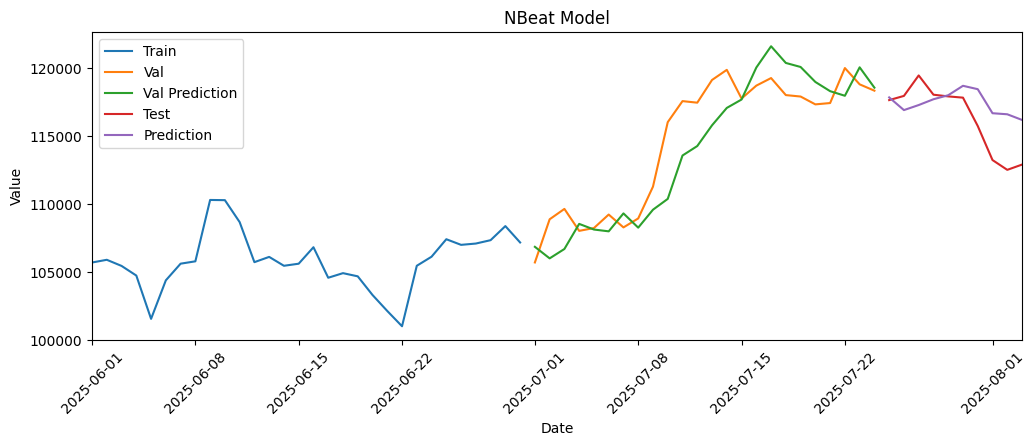

In [ ]:
model14_val_pred = model14.predict(model14_X_val, verbose=False)
model14_pred = model14.predict(model14_X_test, verbose= False)

plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model14_y_train, index= TRAIN_INDEX).loc['2025-06-01':],
        'Val': pd.DataFrame(model14_y_val, index= VAL_INDEX),
        'Val Prediction': pd.DataFrame(model14_val_pred, index= VAL_INDEX),
        'Test': pd.DataFrame(model14_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model14_pred, index= TEST_INDEX)
    },
    title= 'NBeat Model'
)

## Model Evaluation

In [ ]:
model14_eval = evaluate_forecasts(model14_y_val, model14_val_pred, model14_X_train)
model14_eval

{'rmse': 2312.69,
 'mae': 1897.09,
 'r2': 0.77,
 'mase': 0.29,
 'mean_test': 114666.84375,
 'mean_pred': 114011.5,
 'median_test': 117450.5,
 'median_pred': 115036.328125,
 'std_test': 4774.2001953125,
 'std_pred': 5290.009765625}

# Model 15: Ensemble Models

## Data Preparation

In [ ]:
WINDOW_SIZE = 30
HORIZEN = 1

ds_X, ds_y= tf_make_supervised_dataset(
    series= tf.squeeze(df_daily['Close'].to_numpy().astype(np.float32)),
    window_size= WINDOW_SIZE,
    horizon= HORIZEN,
    batch= False,
    shuffle= False,
    zip= False
)

aligned_index = df_daily.index[WINDOW_SIZE: - HORIZEN + 1] if HORIZEN>1 else df_daily.index[WINDOW_SIZE:]

assert len(aligned_index) == ds_X.shape[0], 'Index alignment mismatch: ' + str(len(aligned_index)) + ' != ' + str(ds_X.shape[0])

split_date = '2025-07-01'
split_index = aligned_index.get_loc(split_date)
end_date = '2025-07-25'
end_index = aligned_index.get_loc(end_date)

# Now extract TRAIN and TEST index ranges
TRAIN_INDEX = aligned_index[:split_index]
VAL_INDEX = aligned_index[split_index:end_index]
TEST_INDEX = aligned_index[end_index:]

BATCH_SIZE = 1024
model15_X_train, model15_y_train = ds_X[:split_index], ds_y[:split_index]
model15_X_val, model15_y_val = ds_X[split_index:end_index], ds_y[split_index:end_index]
model15_X_test, model15_y_test = ds_X[end_index:], ds_y[end_index:]

model15_train_dataset = tf.data.Dataset.from_tensor_slices((model15_X_train, model15_y_train))
model15_train_dataset = model15_train_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model15_val_dataset = tf.data.Dataset.from_tensor_slices((model15_X_val, model15_y_val))
model15_val_dataset = model15_val_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

model15_test_dataset = tf.data.Dataset.from_tensor_slices(model15_X_test)
model15_test_dataset = model15_test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

## Building Up The Model

In [ ]:
tf.config.run_functions_eagerly(True)

model15_name = 'Model15_Ensemble'
def ensemble_models(train_dataset, val_dataset, test_dataset, epochs, loss_funcs, activations, optimizers, metrics, callbacks):
    models = []
    preds = []
    val_preds = []
    evals = []

    for loss_func in loss_funcs:
        for activation in activations:
            for optimizer_cls in optimizers:  # pass class, not instance
                print(f"Initializing a model with loss func {loss_func}, activation func {activation}, and optimizer {optimizer_cls}...")
                input = tf.keras.layers.Input(shape=(WINDOW_SIZE,), dtype=tf.float32)
                x = tf.keras.layers.Dense(128, activation=activation, kernel_initializer='he_normal')(input)
                x = tf.keras.layers.Dense(128, activation=activation, kernel_initializer='he_normal')(x)
                output = tf.keras.layers.Dense(HORIZEN, activation='linear')(x)

                model = tf.keras.Model(inputs=input, outputs=output)
                optimizer = optimizer_cls()  # create new instance
                model.compile(
                    loss=loss_func,
                    optimizer=optimizer,
                    metrics=metrics
                )
                model.fit(
                    train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset,
                    callbacks=callbacks,
                    verbose=0
                )
                val_pred = model.predict(val_dataset, verbose=0)
                pred = model.predict(test_dataset, verbose=1)
                eval = evaluate_forecasts(model15_y_val, val_pred, model15_X_train)

                if eval['r2'] > -0.00001:
                    evals.append(eval)
                    models.append(model)
                    preds.append(pred)
                    val_preds.append(val_pred)

    return models, preds, val_preds, evals


In [ ]:
callbacks = ModelCallbacks(verbose=False)
callbacks.tensorboard(dir_name=DIR_NAME_TENSORBOARD, experiment_name= model15_name)
callbacks.early_stopping(patience=30)
callbacks.checkpoint(dir_name=DIR_NAME_CHECKPOINT, experiment_name= model15_name)
callbacks.reduce_lr(factor=0.1)

model15_callbacks = callbacks.get_callbacks()

In [ ]:
models15, models15_preds, models15_val_preds, models15_evals = ensemble_models(
    train_dataset= model15_train_dataset,
    val_dataset= model15_val_dataset,
    test_dataset= model15_test_dataset,
    epochs= 100,
    loss_funcs= [
        tf.keras.losses.MeanAbsoluteError(),
        tf.keras.losses.MeanSquaredError(),
        tf.keras.losses.MeanAbsolutePercentageError(),
        tf.keras.losses.MeanSquaredLogarithmicError()
        ],
    activations= ['relu', 'gelu', 'selu'],
    optimizers= [tf.keras.optimizers.Adam],
    metrics= [tf.keras.metrics.RootMeanSquaredError()],
    callbacks= model15_callbacks
)

Initializing a model with loss func <LossFunctionWrapper(<function mean_absolute_error at 0x7b6816c0a020>, kwargs={})>, activation func relu, and optimizer <class 'keras.src.optimizers.adam.Adam'>...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Initializing a model with loss func <LossFunctionWrapper(<function mean_absolute_error at 0x7b6816c0a020>, kwargs={})>, activation func gelu, and optimizer <class 'keras.src.optimizers.adam.Adam'>...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
Initializing a model with loss func <LossFunctionWrapper(<function mean_absolute_error at 0x7b6816c0a020>, kwargs={})>, activation func selu, and optimizer <class 'keras.src.optimizers.adam.Adam'>...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Initializing a model with loss func <LossFunctionWrapper(<function mean_squared_error at 0x7b6816c09f80>, kwargs={})>, activation func relu, and optimizer <class 'keras.src.optimizers.adam.Adam'>...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
Initializing a model with loss func <LossFunctionWrap

In [ ]:
pd.DataFrame(models15_evals)

rmse      mae    r2  mase     mean_test      mean_pred  median_test  \
0  3024.96  2304.80  0.60  0.35  114666.84375  113922.820312     117450.5   
1  3346.74  2610.84  0.51  0.40  114666.84375  114876.320312     117450.5   
2  3727.50  2899.60  0.39  0.44  114666.84375  113605.312500     117450.5   
3  3442.05  2847.64  0.48  0.43  114666.84375  115106.851562     117450.5   
4  2424.32  1947.27  0.74  0.30  114666.84375  114420.593750     117450.5   
5  2913.77  2293.56  0.63  0.35  114666.84375  114891.117188     117450.5   
6  1922.43  1416.62  0.84  0.22  114666.84375  114214.929688     117450.5   
7  2035.43  1606.02  0.82  0.25  114666.84375  114348.593750     117450.5   
8  2319.90  1718.07  0.76  0.26  114666.84375  113660.843750     117450.5   
9  2654.58  2159.08  0.69  0.33  114666.84375  113834.148438     117450.5   

     median_pred     std_test     std_pred  
0  114051.390625  4774.200195  4953.879883  
1  114996.468750  4774.200195  4528.839844  
2  113944.117188  4774.200195  5606.089844  
3  114406.750000  4774.200195  4181.339844  
4  116402.226562  4774.200195  5528.299805  
5  115015.976562  4774.200195  5049.620117  
6  117463.726562  4774.200195  5045.939941  
7  116015.203125  4774.200195  5032.540039  
8  115726.906250  4774.200195  4958.160156  
9  115498.421875  4774.200195  5741.740234

## Model Prediction

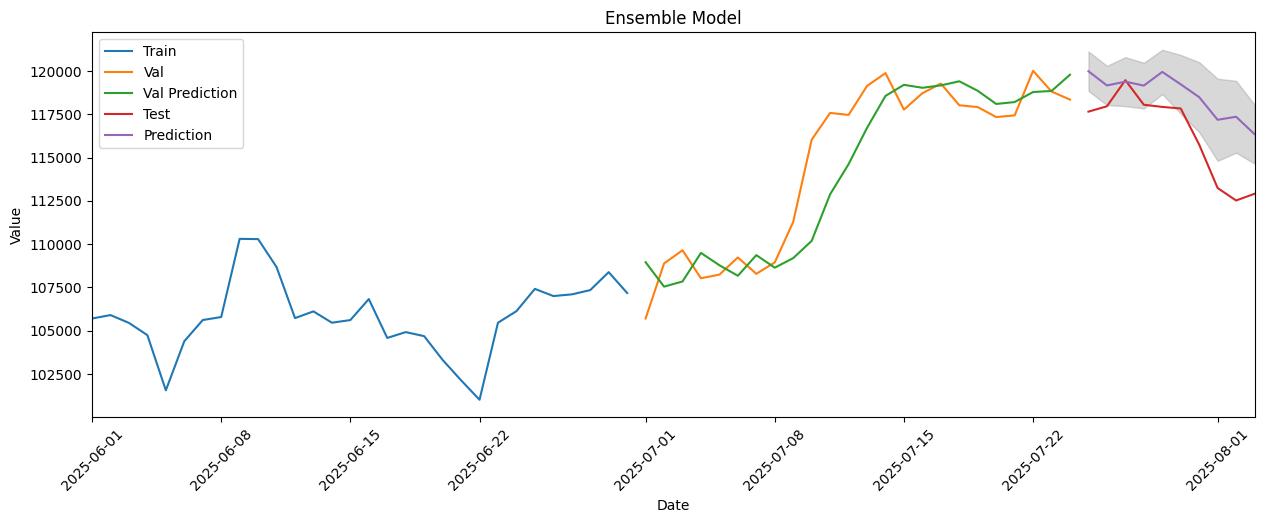

In [ ]:
model15_pred = np.nanmedian(models15_preds, axis=0)
model15_val_pred = np.nanmedian(models15_val_preds, axis=0)

std = np.nanstd(models15_preds, axis=0)

z = 1.96 # z-score (≈ 1.96 for 95% confidence)

upper = tf.squeeze(model15_pred + z * std / np.sqrt(len(model15_pred)))
lower = tf.squeeze(model15_pred - z * std / np.sqrt(len(model15_pred)))

fig, ax = plt.subplots(figsize=(15, 5))

plot_multiple_series(
    series_dict= {
        'Train': pd.DataFrame(model15_y_train, index= TRAIN_INDEX).loc['2025-06-01':],
        'Val': pd.DataFrame(model15_y_val, index= VAL_INDEX),
        'Val Prediction': pd.DataFrame(model15_val_pred, index= VAL_INDEX),
        'Test': pd.DataFrame(model15_y_test, index= TEST_INDEX),
        'Prediction': pd.DataFrame(model15_pred, index= TEST_INDEX)
    },
    title= 'Ensemble Model',
    ax = ax
)

ax.fill_between(
    TEST_INDEX,
    upper,
    lower,
    color= 'grey',
    alpha= 0.3,
    label= 'Confidence Interval'
    )

### Forecast Unkown Future

/usr/local/lib/python3.11/dist-packages/tensorflow/python/data/ops/structured_function.py:258: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


<Axes: title={'center': 'Time Series Comparison'}, xlabel='Date', ylabel='Value'>

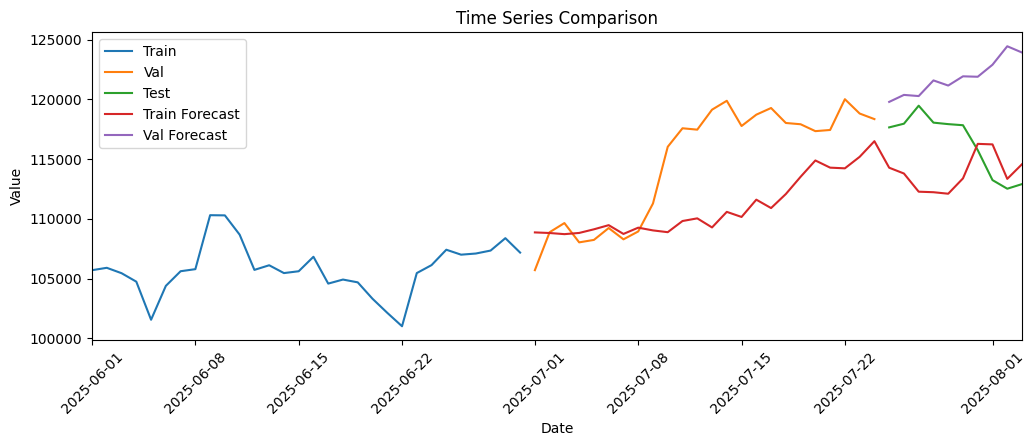

In [ ]:
models15_forecasts = []
models15_val_forecasts = []
for model in models15:
    model_forecast = forecast_future(
        model,
        model15_X_train,
        forecast_horizon = len(VAL_INDEX) + len(TEST_INDEX),
        last_date= TRAIN_INDEX[-1],
        freq='D'
    )
    model_val_forecast = forecast_future(
        model,
        model15_X_val,
        forecast_horizon = len(TEST_INDEX),
        last_date= VAL_INDEX[-1],
        freq='D'
    )
    models15_forecasts.append(model_forecast)
    models15_val_forecasts.append(model_val_forecast)

model15_forecast = np.nanmedian(models15_forecasts, axis=0)
F_INDEX = pd.date_range(start= VAL_INDEX[0], periods= len(VAL_INDEX) + len(TEST_INDEX), freq= 'D')

model15_val_forecast = np.nanmedian(models15_val_forecasts, axis=0)
VF_INDEX = pd.date_range(start= TEST_INDEX[0], periods= len(TEST_INDEX), freq= 'D')

plot_multiple_series(
    series_dict = {
        'Train': pd.DataFrame(model15_y_train, index= TRAIN_INDEX).loc['2025-06-01':],
        'Val': pd.DataFrame(model15_y_val, index= VAL_INDEX),
        #'Val Prediction': pd.DataFrame(model15_val_pred, index= VAL_INDEX),
        'Test': pd.DataFrame(model15_y_test, index= TEST_INDEX),
        #'Prediction': pd.DataFrame(model15_pred, index= TEST_INDEX),
        'Train Forecast': pd.DataFrame(model15_forecast, index= F_INDEX),
        'Val Forecast': pd.DataFrame(model15_val_forecast, index= VF_INDEX)
    }
)

## Model Evaluation

In [ ]:
model15_eval = evaluate_forecasts(model15_y_val, model15_val_pred, model15_X_train)
model15_eval

{'rmse': 2105.02,
 'mae': 1602.03,
 'r2': 0.81,
 'mase': 0.24,
 'mean_test': 114666.84375,
 'mean_pred': 114181.4765625,
 'median_test': 117450.5,
 'median_pred': 115666.40625,
 'std_test': 4774.2001953125,
 'std_pred': 4784.5400390625}